# Design assignment work space

In [3]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from matplotlib import pyplot as plt


c:\Users\tobin\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


System_data of length: 60000 nu=None ny=None normed=False dt=None


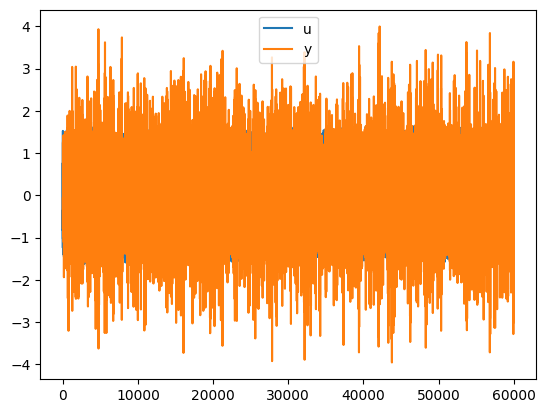

train = System_data of length: 60000 nu=None ny=None normed=False dt=None (60000,) (60000,)


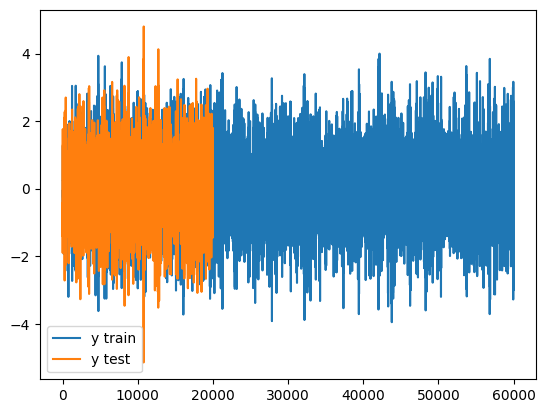

In [2]:
from data import load_data
from sklearn.model_selection import train_test_split
import numpy as np
data_train_u,data_train_y = load_data(train_test='train', as_tensor=False)


data_train_u, data_test_u, data_train_y, data_test_y = train_test_split(data_train_u,data_train_y, shuffle=False)


u_mean, u_std = np.mean(data_train_u),np.std(data_train_u)
y_mean, y_std = np.mean(data_train_y),np.std(data_train_y)

u_mean_test, u_std_test = np.mean(data_test_u),np.std(data_test_u)
y_mean_test, y_std_test = np.mean(data_test_y),np.std(data_test_y)

### Data to train and validate on ###:
utrain = (data_train_u-u_mean)/u_std #normalize
ytrain = (data_train_y-y_mean)/y_std 




utest = (data_test_u-u_mean_test)/u_std_test
ytest = (data_test_y-y_mean_test)/y_std_test

import deepSI
from deepSI import System_data
from  matplotlib import pyplot as plt
system_data = System_data(u=utrain,y=ytrain)
print(system_data) #contains both the input and the output
plt.plot(system_data.u) #system_data.y contains the output array of length N
plt.plot(system_data.y) #system_data.u contains the input  array of length N
plt.legend(['u','y'])
plt.show()
print('train =',system_data, system_data.u.shape, system_data.y.shape)
train = system_data
test = System_data(u=utest,y=ytest)


#train, test = system_data[:45000], system_data[45000:] #slice the datatset in two (or use system_data.train_test_split(split_fraction=0.2))
plt.plot(train.y,label='y train')
plt.plot(test.y,label='y test')
plt.legend()
plt.show()




In [3]:
if True: #train model
    sys = deepSI.fit_systems.SS_encoder(nx=13,na=2,nb=3) #load the encoder system
    sys.n_hidden_layers = 1
    sys.n_nodes_per_layer = 20
    sys.fit(train, val_sys_data=train[-12_000:], epochs=500, batch_size=1024, loss_kwargs=dict(nf=40)) #can be stopped early with keyboard
    #nf = number of steps in each encoder mutiple schooting section (T in the paper)
    sys.save_system('Model_encoder\\encoder')

    
    sim_val = train[-25_000:] #larger validation set
    sys.bestfit = sys.apply_experiment(sim_val).NRMS(sim_val) #reset checkpoint
    #use all the data for final local minima search
    sys.fit(train,sim_val, epochs=200 ,batch_size=1024, loss_kwargs=dict(nf=40)) 
    sys.save_system('Model_encoder\\encoder_stepped')
    
else: #load model from file
    sys = deepSI.load_system('Model_encoder\\encoder')

Initilizing the model and optimizer
Size of the training array =  38.9 MB
N_training_samples = 59958, batch_size = 1024, N_batch_updates_per_epoch = 58
Initial Validation sim-NRMS= 1.0406670871179144


  0%|          | 1/500 [00:06<52:41,  6.34s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.4047507865322955
Epoch    1, sqrt loss  0.7114, Val sim-NRMS 0.4048, Time Loss: 82.2%, data: 0.3%, val: 17.6%,  9.2 batches/sec


  0%|          | 2/500 [00:12<52:06,  6.28s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.326633816343872
Epoch    2, sqrt loss  0.2399, Val sim-NRMS 0.3266, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


  1%|          | 3/500 [00:18<52:11,  6.30s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.29401266255313435
Epoch    3, sqrt loss  0.1895, Val sim-NRMS  0.294, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


  1%|          | 4/500 [00:25<51:52,  6.28s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.11514181560998167
Epoch    4, sqrt loss  0.1127, Val sim-NRMS 0.1151, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.2 batches/sec


  1%|          | 5/500 [00:31<51:52,  6.29s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.10809526510449392
Epoch    5, sqrt loss 0.08006, Val sim-NRMS 0.1081, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


  1%|          | 6/500 [00:37<51:35,  6.27s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.10497994981907913
Epoch    6, sqrt loss 0.07689, Val sim-NRMS  0.105, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


  1%|▏         | 7/500 [00:43<51:20,  6.25s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.09675174725006466
Epoch    7, sqrt loss 0.07475, Val sim-NRMS 0.09675, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.3 batches/sec


  2%|▏         | 8/500 [00:50<51:00,  6.22s/it]

Epoch    8, sqrt loss 0.07741, Val sim-NRMS  0.203, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.3 batches/sec


  2%|▏         | 9/500 [00:56<51:19,  6.27s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.09368524328998523
Epoch    9, sqrt loss  0.1542, Val sim-NRMS 0.09369, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.3 batches/sec


  2%|▏         | 10/500 [01:02<51:23,  6.29s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.0851790397253992
Epoch   10, sqrt loss 0.06313, Val sim-NRMS 0.08518, Time Loss: 82.2%, data: 0.3%, val: 17.4%,  9.2 batches/sec


  2%|▏         | 11/500 [01:09<51:40,  6.34s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.08229398669173567
Epoch   11, sqrt loss 0.06046, Val sim-NRMS 0.08229, Time Loss: 82.2%, data: 0.3%, val: 17.4%,  9.2 batches/sec


  2%|▏         | 12/500 [01:15<52:00,  6.39s/it]

Epoch   12, sqrt loss 0.05983, Val sim-NRMS 0.0825, Time Loss: 82.3%, data: 0.3%, val: 17.4%,  9.2 batches/sec


  3%|▎         | 13/500 [01:22<51:57,  6.40s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.08175173547977732
Epoch   13, sqrt loss 0.05863, Val sim-NRMS 0.08175, Time Loss: 82.3%, data: 0.3%, val: 17.4%,  9.2 batches/sec


  3%|▎         | 14/500 [01:28<51:37,  6.37s/it]

Epoch   14, sqrt loss  0.0572, Val sim-NRMS 0.09082, Time Loss: 82.3%, data: 0.3%, val: 17.4%,  9.2 batches/sec


  3%|▎         | 15/500 [01:34<51:24,  6.36s/it]

Epoch   15, sqrt loss 0.05637, Val sim-NRMS 0.09509, Time Loss: 82.3%, data: 0.3%, val: 17.4%,  9.2 batches/sec


  3%|▎         | 16/500 [01:41<51:14,  6.35s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.07447008233162043
Epoch   16, sqrt loss 0.05655, Val sim-NRMS 0.07447, Time Loss: 82.3%, data: 0.3%, val: 17.4%,  9.2 batches/sec


  3%|▎         | 17/500 [01:47<51:29,  6.40s/it]

Epoch   17, sqrt loss   0.057, Val sim-NRMS 0.08652, Time Loss: 82.3%, data: 0.3%, val: 17.4%,  9.2 batches/sec


  4%|▎         | 18/500 [01:54<51:40,  6.43s/it]

Epoch   18, sqrt loss  0.0566, Val sim-NRMS  0.118, Time Loss: 82.3%, data: 0.3%, val: 17.4%,  9.1 batches/sec


  4%|▍         | 19/500 [02:00<51:24,  6.41s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.07056714795436707
Epoch   19, sqrt loss 0.05506, Val sim-NRMS 0.07057, Time Loss: 82.3%, data: 0.3%, val: 17.4%,  9.1 batches/sec


  4%|▍         | 20/500 [02:06<51:17,  6.41s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.06956196661310866
Epoch   20, sqrt loss 0.06125, Val sim-NRMS 0.06956, Time Loss: 82.3%, data: 0.3%, val: 17.4%,  9.1 batches/sec


  4%|▍         | 21/500 [02:13<51:01,  6.39s/it]

Epoch   21, sqrt loss 0.05445, Val sim-NRMS 0.1202, Time Loss: 82.3%, data: 0.3%, val: 17.4%,  9.1 batches/sec


  4%|▍         | 22/500 [02:19<50:48,  6.38s/it]

Epoch   22, sqrt loss  0.2315, Val sim-NRMS 0.2404, Time Loss: 82.2%, data: 0.3%, val: 17.4%,  9.1 batches/sec


  5%|▍         | 23/500 [02:25<50:41,  6.38s/it]

Epoch   23, sqrt loss 0.09165, Val sim-NRMS 0.07564, Time Loss: 82.2%, data: 0.3%, val: 17.4%,  9.1 batches/sec


  5%|▍         | 24/500 [02:32<50:31,  6.37s/it]

Epoch   24, sqrt loss 0.05416, Val sim-NRMS 0.07352, Time Loss: 82.2%, data: 0.3%, val: 17.4%,  9.1 batches/sec


  5%|▌         | 25/500 [02:38<50:22,  6.36s/it]

Epoch   25, sqrt loss  0.0518, Val sim-NRMS 0.07286, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


  5%|▌         | 26/500 [02:44<50:09,  6.35s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.06845933204621245
Epoch   26, sqrt loss 0.05134, Val sim-NRMS 0.06846, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


  5%|▌         | 27/500 [02:51<50:04,  6.35s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.06784389908119817
Epoch   27, sqrt loss 0.05002, Val sim-NRMS 0.06784, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


  6%|▌         | 28/500 [02:57<50:03,  6.36s/it]

Epoch   28, sqrt loss 0.04994, Val sim-NRMS 0.06851, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


  6%|▌         | 29/500 [03:04<50:07,  6.39s/it]

Epoch   29, sqrt loss 0.05113, Val sim-NRMS 0.07079, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


  6%|▌         | 30/500 [03:10<49:56,  6.38s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.06483600896918414
Epoch   30, sqrt loss 0.04986, Val sim-NRMS 0.06484, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


  6%|▌         | 31/500 [03:16<49:42,  6.36s/it]

Epoch   31, sqrt loss 0.04874, Val sim-NRMS 0.06737, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


  6%|▋         | 32/500 [03:23<49:45,  6.38s/it]

Epoch   32, sqrt loss 0.04869, Val sim-NRMS 0.06484, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


  7%|▋         | 33/500 [03:29<49:40,  6.38s/it]

Epoch   33, sqrt loss 0.04914, Val sim-NRMS 0.06578, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


  7%|▋         | 34/500 [03:36<49:39,  6.39s/it]

Epoch   34, sqrt loss 0.04872, Val sim-NRMS 0.06801, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


  7%|▋         | 35/500 [03:42<49:32,  6.39s/it]

Epoch   35, sqrt loss 0.04818, Val sim-NRMS 0.06785, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


  7%|▋         | 36/500 [03:48<49:33,  6.41s/it]

Epoch   36, sqrt loss 0.05313, Val sim-NRMS 0.06507, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


  7%|▋         | 37/500 [03:55<49:31,  6.42s/it]

Epoch   37, sqrt loss 0.05205, Val sim-NRMS 0.07384, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


  8%|▊         | 38/500 [04:01<49:20,  6.41s/it]

Epoch   38, sqrt loss  0.1242, Val sim-NRMS 0.1315, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


  8%|▊         | 39/500 [04:08<48:59,  6.38s/it]

Epoch   39, sqrt loss  0.0528, Val sim-NRMS 0.06977, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


  8%|▊         | 40/500 [04:14<48:58,  6.39s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.06389442560864092
Epoch   40, sqrt loss 0.04729, Val sim-NRMS 0.06389, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


  8%|▊         | 41/500 [04:20<49:01,  6.41s/it]

Epoch   41, sqrt loss 0.05066, Val sim-NRMS 0.09321, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


  8%|▊         | 42/500 [04:27<48:54,  6.41s/it]

Epoch   42, sqrt loss 0.04954, Val sim-NRMS 0.07775, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


  9%|▊         | 43/500 [04:33<48:37,  6.38s/it]

Epoch   43, sqrt loss  0.0458, Val sim-NRMS 0.0704, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


  9%|▉         | 44/500 [04:39<48:13,  6.35s/it]

Epoch   44, sqrt loss 0.04658, Val sim-NRMS 0.09804, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


  9%|▉         | 45/500 [04:46<47:43,  6.29s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.06063415701386031
Epoch   45, sqrt loss  0.0471, Val sim-NRMS 0.06063, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


  9%|▉         | 46/500 [04:52<47:30,  6.28s/it]

Epoch   46, sqrt loss 0.04521, Val sim-NRMS 0.06543, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


  9%|▉         | 47/500 [04:58<47:25,  6.28s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.059040814632546
Epoch   47, sqrt loss 0.05022, Val sim-NRMS 0.05904, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 10%|▉         | 48/500 [05:05<47:34,  6.32s/it]

Epoch   48, sqrt loss 0.04906, Val sim-NRMS 0.07617, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 10%|▉         | 49/500 [05:11<47:47,  6.36s/it]

Epoch   49, sqrt loss 0.04829, Val sim-NRMS  0.067, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 10%|█         | 50/500 [05:17<47:58,  6.40s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.05770907154306663
Epoch   50, sqrt loss 0.04587, Val sim-NRMS 0.05771, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 10%|█         | 51/500 [05:24<47:47,  6.39s/it]

Epoch   51, sqrt loss 0.04905, Val sim-NRMS 0.07649, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 10%|█         | 52/500 [05:30<47:37,  6.38s/it]

Epoch   52, sqrt loss 0.04899, Val sim-NRMS   0.08, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 11%|█         | 53/500 [05:37<47:35,  6.39s/it]

Epoch   53, sqrt loss 0.04716, Val sim-NRMS 0.05966, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 11%|█         | 54/500 [05:43<47:31,  6.39s/it]

Epoch   54, sqrt loss 0.04545, Val sim-NRMS 0.05889, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 11%|█         | 55/500 [05:49<47:18,  6.38s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.05729579812855055
Epoch   55, sqrt loss 0.04792, Val sim-NRMS 0.0573, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 11%|█         | 56/500 [05:56<47:08,  6.37s/it]

Epoch   56, sqrt loss  0.0487, Val sim-NRMS 0.09314, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 11%|█▏        | 57/500 [06:02<46:51,  6.35s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.05671453512032194
Epoch   57, sqrt loss 0.05914, Val sim-NRMS 0.05671, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 12%|█▏        | 58/500 [06:08<46:43,  6.34s/it]

Epoch   58, sqrt loss 0.04449, Val sim-NRMS  0.107, Time Loss: 82.1%, data: 0.3%, val: 17.6%,  9.1 batches/sec


 12%|█▏        | 59/500 [06:15<46:41,  6.35s/it]

Epoch   59, sqrt loss 0.04678, Val sim-NRMS 0.06652, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 12%|█▏        | 60/500 [06:21<46:35,  6.35s/it]

Epoch   60, sqrt loss 0.04389, Val sim-NRMS 0.05945, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 12%|█▏        | 61/500 [06:28<46:43,  6.39s/it]

Epoch   61, sqrt loss 0.04998, Val sim-NRMS 0.1243, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 12%|█▏        | 62/500 [06:34<46:31,  6.37s/it]

Epoch   62, sqrt loss 0.05941, Val sim-NRMS 0.06001, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 13%|█▎        | 63/500 [06:40<46:24,  6.37s/it]

Epoch   63, sqrt loss  0.0426, Val sim-NRMS 0.07921, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 13%|█▎        | 64/500 [06:46<46:05,  6.34s/it]

Epoch   64, sqrt loss 0.05036, Val sim-NRMS 0.05752, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 13%|█▎        | 65/500 [06:53<45:57,  6.34s/it]

Epoch   65, sqrt loss 0.04525, Val sim-NRMS 0.1263, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 13%|█▎        | 66/500 [06:59<46:04,  6.37s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.05603975380811204
Epoch   66, sqrt loss 0.04859, Val sim-NRMS 0.05604, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 13%|█▎        | 67/500 [07:06<46:01,  6.38s/it]

Epoch   67, sqrt loss 0.04144, Val sim-NRMS 0.06099, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 14%|█▎        | 68/500 [07:12<45:50,  6.37s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.05500258784000081
Epoch   68, sqrt loss 0.04521, Val sim-NRMS  0.055, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 14%|█▍        | 69/500 [07:18<45:36,  6.35s/it]

Epoch   69, sqrt loss 0.04887, Val sim-NRMS 0.09424, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 14%|█▍        | 70/500 [07:25<45:34,  6.36s/it]

Epoch   70, sqrt loss  0.1059, Val sim-NRMS 0.1119, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 14%|█▍        | 71/500 [07:31<45:39,  6.39s/it]

Epoch   71, sqrt loss 0.06176, Val sim-NRMS 0.05888, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 14%|█▍        | 72/500 [07:38<45:39,  6.40s/it]

Epoch   72, sqrt loss 0.04084, Val sim-NRMS 0.05717, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 15%|█▍        | 73/500 [07:44<45:38,  6.41s/it]

Epoch   73, sqrt loss 0.03953, Val sim-NRMS 0.0736, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 15%|█▍        | 74/500 [07:50<45:31,  6.41s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.053524659173790574
Epoch   74, sqrt loss 0.04006, Val sim-NRMS 0.05352, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 15%|█▌        | 75/500 [07:57<45:06,  6.37s/it]

Epoch   75, sqrt loss 0.03935, Val sim-NRMS 0.05377, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 15%|█▌        | 76/500 [08:03<45:08,  6.39s/it]

Epoch   76, sqrt loss 0.03875, Val sim-NRMS 0.07315, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 15%|█▌        | 77/500 [08:09<44:57,  6.38s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.053461608150920235
Epoch   77, sqrt loss 0.04577, Val sim-NRMS 0.05346, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 16%|█▌        | 78/500 [08:16<45:04,  6.41s/it]

Epoch   78, sqrt loss 0.04052, Val sim-NRMS 0.07176, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 16%|█▌        | 79/500 [08:22<44:58,  6.41s/it]

Epoch   79, sqrt loss 0.03999, Val sim-NRMS 0.07737, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 16%|█▌        | 80/500 [08:29<44:45,  6.39s/it]

Epoch   80, sqrt loss  0.0409, Val sim-NRMS 0.06272, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 16%|█▌        | 81/500 [08:35<44:28,  6.37s/it]

Epoch   81, sqrt loss 0.04256, Val sim-NRMS 0.07048, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 16%|█▋        | 82/500 [08:41<44:14,  6.35s/it]

Epoch   82, sqrt loss  0.0417, Val sim-NRMS 0.07645, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 17%|█▋        | 83/500 [08:48<44:08,  6.35s/it]

Epoch   83, sqrt loss 0.04785, Val sim-NRMS 0.09088, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 17%|█▋        | 84/500 [08:54<44:01,  6.35s/it]

Epoch   84, sqrt loss 0.04097, Val sim-NRMS 0.05774, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 17%|█▋        | 85/500 [09:00<44:00,  6.36s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.052909919764559825
Epoch   85, sqrt loss 0.04611, Val sim-NRMS 0.05291, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 17%|█▋        | 86/500 [09:07<43:51,  6.36s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.052083205762764116
Epoch   86, sqrt loss  0.0439, Val sim-NRMS 0.05208, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 17%|█▋        | 87/500 [09:13<43:40,  6.35s/it]

Epoch   87, sqrt loss  0.0411, Val sim-NRMS 0.05835, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 18%|█▊        | 88/500 [09:20<43:47,  6.38s/it]

Epoch   88, sqrt loss 0.04225, Val sim-NRMS 0.08454, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 18%|█▊        | 89/500 [09:26<43:41,  6.38s/it]

Epoch   89, sqrt loss 0.03945, Val sim-NRMS 0.1168, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 18%|█▊        | 90/500 [09:32<43:42,  6.40s/it]

Epoch   90, sqrt loss 0.05134, Val sim-NRMS 0.05675, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 18%|█▊        | 91/500 [09:39<43:34,  6.39s/it]

Epoch   91, sqrt loss 0.03709, Val sim-NRMS 0.06889, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 18%|█▊        | 92/500 [09:45<43:15,  6.36s/it]

Epoch   92, sqrt loss 0.03824, Val sim-NRMS 0.09828, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 19%|█▊        | 93/500 [09:51<42:52,  6.32s/it]

Epoch   93, sqrt loss 0.04674, Val sim-NRMS 0.05644, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 19%|█▉        | 94/500 [09:58<42:50,  6.33s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.047390400689782654
Epoch   94, sqrt loss 0.04097, Val sim-NRMS 0.04739, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 19%|█▉        | 95/500 [10:04<42:52,  6.35s/it]

Epoch   95, sqrt loss 0.04027, Val sim-NRMS 0.1143, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 19%|█▉        | 96/500 [10:10<42:48,  6.36s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.04689035010378865
Epoch   96, sqrt loss  0.0444, Val sim-NRMS 0.04689, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 19%|█▉        | 97/500 [10:17<42:46,  6.37s/it]

Epoch   97, sqrt loss 0.03892, Val sim-NRMS 0.05573, Time Loss: 82.1%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 20%|█▉        | 98/500 [10:23<42:40,  6.37s/it]

Epoch   98, sqrt loss 0.04538, Val sim-NRMS 0.0839, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 20%|█▉        | 99/500 [10:30<42:37,  6.38s/it]

Epoch   99, sqrt loss 0.03919, Val sim-NRMS 0.0567, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 20%|██        | 100/500 [10:36<42:34,  6.39s/it]

Epoch  100, sqrt loss 0.04094, Val sim-NRMS 0.06452, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 20%|██        | 101/500 [10:42<42:22,  6.37s/it]

Epoch  101, sqrt loss 0.04967, Val sim-NRMS 0.08435, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 20%|██        | 102/500 [10:49<42:28,  6.40s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.045406007348068975
Epoch  102, sqrt loss 0.03957, Val sim-NRMS 0.04541, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 21%|██        | 103/500 [10:55<42:18,  6.39s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.044873870028459585
Epoch  103, sqrt loss 0.03623, Val sim-NRMS 0.04487, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 21%|██        | 104/500 [11:01<42:02,  6.37s/it]

Epoch  104, sqrt loss 0.03822, Val sim-NRMS 0.05877, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 21%|██        | 105/500 [11:08<41:30,  6.31s/it]

Epoch  105, sqrt loss 0.04762, Val sim-NRMS 0.04767, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 21%|██        | 106/500 [11:14<41:24,  6.31s/it]

Epoch  106, sqrt loss 0.03317, Val sim-NRMS 0.04894, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 21%|██▏       | 107/500 [11:20<41:05,  6.27s/it]

Epoch  107, sqrt loss 0.04012, Val sim-NRMS 0.07666, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 22%|██▏       | 108/500 [11:26<40:57,  6.27s/it]

Epoch  108, sqrt loss 0.03729, Val sim-NRMS  0.059, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 22%|██▏       | 109/500 [11:33<41:09,  6.32s/it]

Epoch  109, sqrt loss 0.04244, Val sim-NRMS 0.1362, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 22%|██▏       | 110/500 [11:39<41:06,  6.32s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.04017750809220602
Epoch  110, sqrt loss 0.04323, Val sim-NRMS 0.04018, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 22%|██▏       | 111/500 [11:46<41:19,  6.37s/it]

Epoch  111, sqrt loss 0.04099, Val sim-NRMS 0.0482, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 22%|██▏       | 112/500 [11:52<41:13,  6.37s/it]

Epoch  112, sqrt loss  0.0339, Val sim-NRMS 0.09401, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 23%|██▎       | 113/500 [11:58<41:00,  6.36s/it]

Epoch  113, sqrt loss 0.03466, Val sim-NRMS 0.05447, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 23%|██▎       | 114/500 [12:05<41:10,  6.40s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.03845173807967333
Epoch  114, sqrt loss 0.03829, Val sim-NRMS 0.03845, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 23%|██▎       | 115/500 [12:11<41:05,  6.40s/it]

Epoch  115, sqrt loss 0.03984, Val sim-NRMS 0.07625, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 23%|██▎       | 116/500 [12:18<41:11,  6.44s/it]

Epoch  116, sqrt loss 0.03745, Val sim-NRMS 0.03897, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 23%|██▎       | 117/500 [12:24<40:57,  6.42s/it]

Epoch  117, sqrt loss 0.03754, Val sim-NRMS 0.05436, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 24%|██▎       | 118/500 [12:31<40:53,  6.42s/it]

Epoch  118, sqrt loss  0.0362, Val sim-NRMS 0.06341, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 24%|██▍       | 119/500 [12:37<40:42,  6.41s/it]

Epoch  119, sqrt loss 0.03805, Val sim-NRMS  0.125, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 24%|██▍       | 120/500 [12:43<40:28,  6.39s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.03718861394015015
Epoch  120, sqrt loss 0.04426, Val sim-NRMS 0.03719, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 24%|██▍       | 121/500 [12:50<40:26,  6.40s/it]

Epoch  121, sqrt loss 0.03214, Val sim-NRMS 0.04415, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 24%|██▍       | 122/500 [12:56<40:45,  6.47s/it]

Epoch  122, sqrt loss 0.04479, Val sim-NRMS 0.05769, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 25%|██▍       | 123/500 [13:03<40:47,  6.49s/it]

Epoch  123, sqrt loss 0.03427, Val sim-NRMS 0.04657, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 25%|██▍       | 124/500 [13:09<40:24,  6.45s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.03508431748417807
Epoch  124, sqrt loss 0.02966, Val sim-NRMS 0.03508, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 25%|██▌       | 125/500 [13:16<39:57,  6.39s/it]

Epoch  125, sqrt loss 0.03074, Val sim-NRMS 0.03698, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 25%|██▌       | 126/500 [13:22<39:51,  6.39s/it]

Epoch  126, sqrt loss 0.03175, Val sim-NRMS 0.07749, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 25%|██▌       | 127/500 [13:28<39:41,  6.39s/it]

Epoch  127, sqrt loss 0.03073, Val sim-NRMS 0.1101, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 26%|██▌       | 128/500 [13:35<39:28,  6.37s/it]

Epoch  128, sqrt loss 0.03987, Val sim-NRMS 0.06202, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 26%|██▌       | 129/500 [13:41<39:11,  6.34s/it]

Epoch  129, sqrt loss 0.02953, Val sim-NRMS 0.0379, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 26%|██▌       | 130/500 [13:47<39:11,  6.35s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.029925603707947335
Epoch  130, sqrt loss 0.03614, Val sim-NRMS 0.02993, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 26%|██▌       | 131/500 [13:54<38:58,  6.34s/it]

Epoch  131, sqrt loss 0.03064, Val sim-NRMS 0.1098, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 26%|██▋       | 132/500 [14:00<38:54,  6.34s/it]

Epoch  132, sqrt loss 0.03017, Val sim-NRMS 0.03635, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 27%|██▋       | 133/500 [14:06<39:02,  6.38s/it]

Epoch  133, sqrt loss 0.03505, Val sim-NRMS 0.0357, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 27%|██▋       | 134/500 [14:13<39:04,  6.41s/it]

Epoch  134, sqrt loss 0.04402, Val sim-NRMS 0.2454, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 27%|██▋       | 135/500 [14:19<38:53,  6.39s/it]

Epoch  135, sqrt loss  0.1135, Val sim-NRMS 0.05605, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 27%|██▋       | 136/500 [14:26<38:44,  6.39s/it]

Epoch  136, sqrt loss 0.03227, Val sim-NRMS 0.0357, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 27%|██▋       | 137/500 [14:32<38:40,  6.39s/it]

Epoch  137, sqrt loss 0.02819, Val sim-NRMS 0.0343, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 28%|██▊       | 138/500 [14:38<38:38,  6.41s/it]

Epoch  138, sqrt loss 0.02706, Val sim-NRMS 0.03768, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 28%|██▊       | 139/500 [14:45<38:36,  6.42s/it]

Epoch  139, sqrt loss 0.02656, Val sim-NRMS 0.03214, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 28%|██▊       | 140/500 [14:51<38:25,  6.41s/it]

Epoch  140, sqrt loss 0.02523, Val sim-NRMS 0.03124, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 28%|██▊       | 141/500 [14:58<38:17,  6.40s/it]

Epoch  141, sqrt loss 0.02626, Val sim-NRMS 0.03612, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 28%|██▊       | 142/500 [15:04<38:05,  6.38s/it]

Epoch  142, sqrt loss 0.02652, Val sim-NRMS 0.03184, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 29%|██▊       | 143/500 [15:10<37:51,  6.36s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.027435678094221445
Epoch  143, sqrt loss 0.02483, Val sim-NRMS 0.02744, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 29%|██▉       | 144/500 [15:17<37:39,  6.35s/it]

Epoch  144, sqrt loss 0.02717, Val sim-NRMS 0.0389, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 29%|██▉       | 145/500 [15:23<37:29,  6.34s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.026894170469274014
Epoch  145, sqrt loss 0.02637, Val sim-NRMS 0.02689, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 29%|██▉       | 146/500 [15:29<37:34,  6.37s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.025656831035243417
Epoch  146, sqrt loss 0.02643, Val sim-NRMS 0.02566, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 29%|██▉       | 147/500 [15:36<37:24,  6.36s/it]

Epoch  147, sqrt loss 0.03115, Val sim-NRMS 0.04467, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 30%|██▉       | 148/500 [15:42<37:25,  6.38s/it]

Epoch  148, sqrt loss 0.02775, Val sim-NRMS  0.092, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 30%|██▉       | 149/500 [15:49<37:19,  6.38s/it]

Epoch  149, sqrt loss 0.03474, Val sim-NRMS 0.04163, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 30%|███       | 150/500 [15:55<37:28,  6.42s/it]

Epoch  150, sqrt loss 0.02549, Val sim-NRMS 0.03705, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 30%|███       | 151/500 [16:02<37:27,  6.44s/it]

Epoch  151, sqrt loss 0.02924, Val sim-NRMS 0.08553, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 30%|███       | 152/500 [16:08<37:16,  6.43s/it]

Epoch  152, sqrt loss 0.03891, Val sim-NRMS 0.05136, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 31%|███       | 153/500 [16:14<36:58,  6.39s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.025380348755175464
Epoch  153, sqrt loss  0.0262, Val sim-NRMS 0.02538, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 31%|███       | 154/500 [16:21<36:52,  6.39s/it]

Epoch  154, sqrt loss 0.02723, Val sim-NRMS 0.02575, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 31%|███       | 155/500 [16:27<36:40,  6.38s/it]

Epoch  155, sqrt loss 0.02784, Val sim-NRMS 0.03248, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 31%|███       | 156/500 [16:33<36:43,  6.41s/it]

Epoch  156, sqrt loss 0.02742, Val sim-NRMS 0.04461, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 31%|███▏      | 157/500 [16:40<36:47,  6.44s/it]

Epoch  157, sqrt loss 0.03073, Val sim-NRMS 0.03163, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 32%|███▏      | 158/500 [16:46<36:52,  6.47s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.02536028558253553
Epoch  158, sqrt loss 0.03261, Val sim-NRMS 0.02536, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 32%|███▏      | 159/500 [16:53<36:40,  6.45s/it]

Epoch  159, sqrt loss 0.02983, Val sim-NRMS 0.04534, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 32%|███▏      | 160/500 [16:59<36:38,  6.47s/it]

Epoch  160, sqrt loss 0.03664, Val sim-NRMS 0.1232, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 32%|███▏      | 161/500 [17:06<36:37,  6.48s/it]

Epoch  161, sqrt loss 0.03135, Val sim-NRMS 0.04306, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 32%|███▏      | 162/500 [17:12<36:30,  6.48s/it]

Epoch  162, sqrt loss 0.02535, Val sim-NRMS 0.04731, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 33%|███▎      | 163/500 [17:19<36:14,  6.45s/it]

Epoch  163, sqrt loss 0.02475, Val sim-NRMS 0.03993, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 33%|███▎      | 164/500 [17:25<35:59,  6.43s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.025196698073275885
Epoch  164, sqrt loss 0.03061, Val sim-NRMS 0.0252, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 33%|███▎      | 165/500 [17:31<35:30,  6.36s/it]

Epoch  165, sqrt loss 0.02725, Val sim-NRMS 0.02977, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 33%|███▎      | 166/500 [17:38<35:14,  6.33s/it]

Epoch  166, sqrt loss 0.03223, Val sim-NRMS 0.03229, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 33%|███▎      | 167/500 [17:44<35:03,  6.32s/it]

Epoch  167, sqrt loss 0.02724, Val sim-NRMS 0.02788, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 34%|███▎      | 168/500 [17:50<34:59,  6.32s/it]

Epoch  168, sqrt loss 0.02442, Val sim-NRMS 0.02854, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 34%|███▍      | 169/500 [17:57<35:02,  6.35s/it]

Epoch  169, sqrt loss 0.04025, Val sim-NRMS 0.02761, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 34%|███▍      | 170/500 [18:03<35:08,  6.39s/it]

Epoch  170, sqrt loss 0.02482, Val sim-NRMS 0.03102, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 34%|███▍      | 171/500 [18:10<35:05,  6.40s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.024279596801499544
Epoch  171, sqrt loss  0.0263, Val sim-NRMS 0.02428, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 34%|███▍      | 172/500 [18:16<34:54,  6.39s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.021552396744447855
Epoch  172, sqrt loss 0.02629, Val sim-NRMS 0.02155, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 35%|███▍      | 173/500 [18:22<34:44,  6.38s/it]

Epoch  173, sqrt loss  0.0268, Val sim-NRMS 0.06018, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 35%|███▍      | 174/500 [18:29<34:35,  6.37s/it]

Epoch  174, sqrt loss 0.02571, Val sim-NRMS 0.03838, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 35%|███▌      | 175/500 [18:35<34:44,  6.41s/it]

Epoch  175, sqrt loss 0.03128, Val sim-NRMS 0.02231, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 35%|███▌      | 176/500 [18:42<34:43,  6.43s/it]

Epoch  176, sqrt loss 0.03412, Val sim-NRMS 0.03706, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 35%|███▌      | 177/500 [18:48<34:22,  6.39s/it]

Epoch  177, sqrt loss 0.02582, Val sim-NRMS 0.07727, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 36%|███▌      | 178/500 [18:54<34:09,  6.37s/it]

Epoch  178, sqrt loss 0.02802, Val sim-NRMS 0.02383, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 36%|███▌      | 179/500 [19:01<34:00,  6.36s/it]

Epoch  179, sqrt loss 0.02874, Val sim-NRMS 0.03932, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 36%|███▌      | 180/500 [19:07<33:44,  6.33s/it]

Epoch  180, sqrt loss 0.02561, Val sim-NRMS 0.02869, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 36%|███▌      | 181/500 [19:13<34:03,  6.41s/it]

Epoch  181, sqrt loss 0.02818, Val sim-NRMS 0.0862, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 36%|███▋      | 182/500 [19:20<33:55,  6.40s/it]

Epoch  182, sqrt loss 0.02866, Val sim-NRMS 0.04881, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 37%|███▋      | 183/500 [19:26<33:42,  6.38s/it]

Epoch  183, sqrt loss 0.02334, Val sim-NRMS 0.1062, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 37%|███▋      | 184/500 [19:32<33:30,  6.36s/it]

Epoch  184, sqrt loss 0.03672, Val sim-NRMS 0.03094, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 37%|███▋      | 185/500 [19:39<33:13,  6.33s/it]

Epoch  185, sqrt loss 0.02665, Val sim-NRMS 0.03017, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 37%|███▋      | 186/500 [19:45<33:10,  6.34s/it]

Epoch  186, sqrt loss 0.02843, Val sim-NRMS 0.05438, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 37%|███▋      | 187/500 [19:51<33:09,  6.36s/it]

Epoch  187, sqrt loss 0.03098, Val sim-NRMS 0.04792, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 38%|███▊      | 188/500 [19:58<33:06,  6.37s/it]

Epoch  188, sqrt loss 0.02583, Val sim-NRMS 0.0292, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 38%|███▊      | 189/500 [20:04<32:50,  6.34s/it]

Epoch  189, sqrt loss 0.02556, Val sim-NRMS 0.0466, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 38%|███▊      | 190/500 [20:10<32:44,  6.34s/it]

Epoch  190, sqrt loss 0.02351, Val sim-NRMS 0.03968, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 38%|███▊      | 191/500 [20:17<32:34,  6.32s/it]

Epoch  191, sqrt loss 0.02253, Val sim-NRMS 0.05539, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 38%|███▊      | 192/500 [20:23<32:26,  6.32s/it]

Epoch  192, sqrt loss 0.03328, Val sim-NRMS 0.09596, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 39%|███▊      | 193/500 [20:29<32:21,  6.32s/it]

Epoch  193, sqrt loss 0.02703, Val sim-NRMS  0.036, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 39%|███▉      | 194/500 [20:36<32:19,  6.34s/it]

Epoch  194, sqrt loss 0.02343, Val sim-NRMS 0.03237, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 39%|███▉      | 195/500 [20:42<32:08,  6.32s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.020734094686848108
Epoch  195, sqrt loss 0.03546, Val sim-NRMS 0.02073, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 39%|███▉      | 196/500 [20:48<31:58,  6.31s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.018832387030252033
Epoch  196, sqrt loss 0.02229, Val sim-NRMS 0.01883, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 39%|███▉      | 197/500 [20:55<31:52,  6.31s/it]

Epoch  197, sqrt loss  0.0224, Val sim-NRMS 0.06345, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 40%|███▉      | 198/500 [21:01<31:41,  6.30s/it]

Epoch  198, sqrt loss 0.02626, Val sim-NRMS 0.02503, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 40%|███▉      | 199/500 [21:07<31:32,  6.29s/it]

Epoch  199, sqrt loss  0.0316, Val sim-NRMS 0.02511, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 40%|████      | 200/500 [21:14<31:33,  6.31s/it]

Epoch  200, sqrt loss 0.02452, Val sim-NRMS 0.02513, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 40%|████      | 201/500 [21:20<31:29,  6.32s/it]

Epoch  201, sqrt loss 0.02248, Val sim-NRMS 0.02237, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 40%|████      | 202/500 [21:26<31:31,  6.35s/it]

Epoch  202, sqrt loss 0.02461, Val sim-NRMS 0.03425, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 41%|████      | 203/500 [21:33<31:28,  6.36s/it]

Epoch  203, sqrt loss 0.02591, Val sim-NRMS 0.04374, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 41%|████      | 204/500 [21:39<31:23,  6.36s/it]

Epoch  204, sqrt loss 0.03593, Val sim-NRMS 0.0245, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 41%|████      | 205/500 [21:46<31:35,  6.42s/it]

Epoch  205, sqrt loss 0.02202, Val sim-NRMS 0.06989, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 41%|████      | 206/500 [21:52<31:28,  6.42s/it]

Epoch  206, sqrt loss 0.02679, Val sim-NRMS 0.01926, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 41%|████▏     | 207/500 [21:58<31:18,  6.41s/it]

Epoch  207, sqrt loss 0.02428, Val sim-NRMS 0.04476, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 42%|████▏     | 208/500 [22:05<31:03,  6.38s/it]

Epoch  208, sqrt loss 0.02682, Val sim-NRMS 0.1051, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 42%|████▏     | 209/500 [22:11<31:04,  6.41s/it]

Epoch  209, sqrt loss 0.02907, Val sim-NRMS 0.02075, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 42%|████▏     | 210/500 [22:18<31:03,  6.43s/it]

Epoch  210, sqrt loss  0.0261, Val sim-NRMS 0.04717, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 42%|████▏     | 211/500 [22:24<31:00,  6.44s/it]

Epoch  211, sqrt loss 0.03564, Val sim-NRMS 0.0242, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 42%|████▏     | 212/500 [22:31<30:51,  6.43s/it]

Epoch  212, sqrt loss 0.02093, Val sim-NRMS 0.03439, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 43%|████▎     | 213/500 [22:37<30:37,  6.40s/it]

Epoch  213, sqrt loss 0.02013, Val sim-NRMS 0.03967, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 43%|████▎     | 214/500 [22:43<30:31,  6.40s/it]

Epoch  214, sqrt loss 0.02232, Val sim-NRMS 0.07243, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 43%|████▎     | 215/500 [22:50<30:21,  6.39s/it]

Epoch  215, sqrt loss  0.0295, Val sim-NRMS 0.08055, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 43%|████▎     | 216/500 [22:56<30:27,  6.44s/it]

Epoch  216, sqrt loss 0.02398, Val sim-NRMS 0.01973, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 43%|████▎     | 217/500 [23:03<30:27,  6.46s/it]

Epoch  217, sqrt loss 0.02204, Val sim-NRMS 0.0208, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 44%|████▎     | 218/500 [23:09<30:20,  6.45s/it]

Epoch  218, sqrt loss 0.02578, Val sim-NRMS 0.04394, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 44%|████▍     | 219/500 [23:15<30:03,  6.42s/it]

Epoch  219, sqrt loss 0.02829, Val sim-NRMS 0.06341, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 44%|████▍     | 220/500 [23:22<29:51,  6.40s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.01835401725312481
Epoch  220, sqrt loss 0.02449, Val sim-NRMS 0.01835, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 44%|████▍     | 221/500 [23:28<29:39,  6.38s/it]

Epoch  221, sqrt loss  0.0209, Val sim-NRMS 0.04554, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 44%|████▍     | 222/500 [23:34<29:24,  6.35s/it]

Epoch  222, sqrt loss 0.02492, Val sim-NRMS 0.05701, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 45%|████▍     | 223/500 [23:41<29:17,  6.35s/it]

Epoch  223, sqrt loss 0.02511, Val sim-NRMS 0.02647, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 45%|████▍     | 224/500 [23:47<29:08,  6.33s/it]

Epoch  224, sqrt loss 0.02335, Val sim-NRMS 0.05242, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 45%|████▌     | 225/500 [23:53<28:57,  6.32s/it]

Epoch  225, sqrt loss 0.02311, Val sim-NRMS 0.0235, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 45%|████▌     | 226/500 [24:00<28:52,  6.32s/it]

Epoch  226, sqrt loss 0.02764, Val sim-NRMS 0.0362, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 45%|████▌     | 227/500 [24:06<28:34,  6.28s/it]

Epoch  227, sqrt loss 0.02504, Val sim-NRMS 0.0371, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 46%|████▌     | 228/500 [24:12<28:23,  6.26s/it]

Epoch  228, sqrt loss 0.02194, Val sim-NRMS 0.04396, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 46%|████▌     | 229/500 [24:18<28:11,  6.24s/it]

Epoch  229, sqrt loss  0.0302, Val sim-NRMS 0.07824, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 46%|████▌     | 230/500 [24:25<28:08,  6.25s/it]

Epoch  230, sqrt loss 0.02487, Val sim-NRMS 0.04128, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 46%|████▌     | 231/500 [24:31<28:09,  6.28s/it]

Epoch  231, sqrt loss 0.02212, Val sim-NRMS 0.0209, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 46%|████▋     | 232/500 [24:37<28:09,  6.31s/it]

Epoch  232, sqrt loss 0.02246, Val sim-NRMS 0.01938, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 47%|████▋     | 233/500 [24:44<28:09,  6.33s/it]

Epoch  233, sqrt loss 0.07029, Val sim-NRMS 0.3879, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 47%|████▋     | 234/500 [24:50<27:59,  6.31s/it]

Epoch  234, sqrt loss 0.05554, Val sim-NRMS 0.02574, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 47%|████▋     | 235/500 [24:56<27:59,  6.34s/it]

Epoch  235, sqrt loss 0.01933, Val sim-NRMS 0.01877, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 47%|████▋     | 236/500 [25:03<27:54,  6.34s/it]

Epoch  236, sqrt loss 0.01842, Val sim-NRMS 0.02222, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 47%|████▋     | 237/500 [25:09<27:44,  6.33s/it]

Epoch  237, sqrt loss 0.01848, Val sim-NRMS 0.02495, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 48%|████▊     | 238/500 [25:15<27:32,  6.31s/it]

Epoch  238, sqrt loss  0.0194, Val sim-NRMS 0.02089, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 48%|████▊     | 239/500 [25:22<27:29,  6.32s/it]

Epoch  239, sqrt loss 0.01902, Val sim-NRMS 0.02689, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 48%|████▊     | 240/500 [25:28<27:22,  6.32s/it]

Epoch  240, sqrt loss 0.01846, Val sim-NRMS 0.01851, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 48%|████▊     | 241/500 [25:34<27:12,  6.30s/it]

Epoch  241, sqrt loss  0.0331, Val sim-NRMS 0.1173, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 48%|████▊     | 242/500 [25:41<27:12,  6.33s/it]

Epoch  242, sqrt loss 0.06327, Val sim-NRMS 0.03246, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 49%|████▊     | 243/500 [25:47<27:08,  6.34s/it]

Epoch  243, sqrt loss  0.0194, Val sim-NRMS 0.01996, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 49%|████▉     | 244/500 [25:53<27:04,  6.34s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.016943828254109786
Epoch  244, sqrt loss 0.01765, Val sim-NRMS 0.01694, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 49%|████▉     | 245/500 [26:00<26:58,  6.35s/it]

Epoch  245, sqrt loss 0.01805, Val sim-NRMS 0.0251, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 49%|████▉     | 246/500 [26:06<26:44,  6.32s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.01663141895871043
Epoch  246, sqrt loss 0.01737, Val sim-NRMS 0.01663, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 49%|████▉     | 247/500 [26:12<26:42,  6.33s/it]

Epoch  247, sqrt loss  0.0174, Val sim-NRMS 0.01729, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 50%|████▉     | 248/500 [26:19<26:34,  6.33s/it]

Epoch  248, sqrt loss 0.01867, Val sim-NRMS 0.02659, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 50%|████▉     | 249/500 [26:25<26:29,  6.33s/it]

Epoch  249, sqrt loss 0.02044, Val sim-NRMS 0.02044, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 50%|█████     | 250/500 [26:31<26:15,  6.30s/it]

Epoch  250, sqrt loss 0.01859, Val sim-NRMS 0.01884, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 50%|█████     | 251/500 [26:37<26:08,  6.30s/it]

Epoch  251, sqrt loss 0.01994, Val sim-NRMS 0.0175, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 50%|█████     | 252/500 [26:44<25:56,  6.28s/it]

Epoch  252, sqrt loss 0.01803, Val sim-NRMS 0.01863, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 51%|█████     | 253/500 [26:50<25:43,  6.25s/it]

Epoch  253, sqrt loss 0.01942, Val sim-NRMS 0.03145, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 51%|█████     | 254/500 [26:56<25:29,  6.22s/it]

Epoch  254, sqrt loss 0.01962, Val sim-NRMS 0.05943, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 51%|█████     | 255/500 [27:02<25:16,  6.19s/it]

Epoch  255, sqrt loss 0.02116, Val sim-NRMS 0.04641, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 51%|█████     | 256/500 [27:09<25:28,  6.26s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.016347830876324645
Epoch  256, sqrt loss 0.01918, Val sim-NRMS 0.01635, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 51%|█████▏    | 257/500 [27:15<25:27,  6.29s/it]

Epoch  257, sqrt loss 0.02241, Val sim-NRMS 0.01662, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 52%|█████▏    | 258/500 [27:21<25:22,  6.29s/it]

Epoch  258, sqrt loss 0.01958, Val sim-NRMS 0.01778, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 52%|█████▏    | 259/500 [27:28<25:21,  6.31s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.015831974479850817
Epoch  259, sqrt loss  0.0212, Val sim-NRMS 0.01583, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 52%|█████▏    | 260/500 [27:34<25:12,  6.30s/it]

Epoch  260, sqrt loss 0.02054, Val sim-NRMS 0.09645, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 52%|█████▏    | 261/500 [27:40<24:56,  6.26s/it]

Epoch  261, sqrt loss 0.03388, Val sim-NRMS 0.02054, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 52%|█████▏    | 262/500 [27:46<24:42,  6.23s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.015764706795126607
Epoch  262, sqrt loss 0.01808, Val sim-NRMS 0.01576, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 53%|█████▎    | 263/500 [27:52<24:35,  6.23s/it]

Epoch  263, sqrt loss 0.02087, Val sim-NRMS 0.05105, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 53%|█████▎    | 264/500 [27:59<24:29,  6.23s/it]

Epoch  264, sqrt loss 0.02445, Val sim-NRMS 0.02526, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 53%|█████▎    | 265/500 [28:05<24:20,  6.21s/it]

Epoch  265, sqrt loss 0.01968, Val sim-NRMS 0.01908, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 53%|█████▎    | 266/500 [28:11<24:10,  6.20s/it]

Epoch  266, sqrt loss 0.03784, Val sim-NRMS 0.03046, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 53%|█████▎    | 267/500 [28:17<24:02,  6.19s/it]

Epoch  267, sqrt loss  0.0274, Val sim-NRMS 0.02597, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 54%|█████▎    | 268/500 [28:23<23:56,  6.19s/it]

Epoch  268, sqrt loss 0.01883, Val sim-NRMS 0.02177, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 54%|█████▍    | 269/500 [28:30<23:48,  6.19s/it]

Epoch  269, sqrt loss 0.01919, Val sim-NRMS 0.04257, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 54%|█████▍    | 270/500 [28:36<23:42,  6.19s/it]

Epoch  270, sqrt loss 0.02145, Val sim-NRMS 0.02882, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 54%|█████▍    | 271/500 [28:42<23:34,  6.18s/it]

Epoch  271, sqrt loss 0.01894, Val sim-NRMS 0.02432, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 54%|█████▍    | 272/500 [28:48<23:30,  6.19s/it]

Epoch  272, sqrt loss 0.01982, Val sim-NRMS 0.03047, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 55%|█████▍    | 273/500 [28:54<23:29,  6.21s/it]

Epoch  273, sqrt loss  0.0224, Val sim-NRMS 0.04792, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 55%|█████▍    | 274/500 [29:00<23:21,  6.20s/it]

Epoch  274, sqrt loss 0.02364, Val sim-NRMS 0.03082, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 55%|█████▌    | 275/500 [29:07<23:11,  6.18s/it]

Epoch  275, sqrt loss 0.01959, Val sim-NRMS 0.02959, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 55%|█████▌    | 276/500 [29:13<23:18,  6.24s/it]

Epoch  276, sqrt loss 0.02018, Val sim-NRMS 0.02209, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 55%|█████▌    | 277/500 [29:19<23:23,  6.30s/it]

Epoch  277, sqrt loss 0.02133, Val sim-NRMS 0.02365, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 56%|█████▌    | 278/500 [29:26<23:22,  6.32s/it]

Epoch  278, sqrt loss 0.02813, Val sim-NRMS 0.05012, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 56%|█████▌    | 279/500 [29:32<23:22,  6.34s/it]

Epoch  279, sqrt loss 0.01929, Val sim-NRMS 0.03894, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 56%|█████▌    | 280/500 [29:39<23:15,  6.34s/it]

Epoch  280, sqrt loss 0.01977, Val sim-NRMS 0.01805, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 56%|█████▌    | 281/500 [29:45<23:00,  6.31s/it]

Epoch  281, sqrt loss 0.02308, Val sim-NRMS 0.04493, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 56%|█████▋    | 282/500 [29:51<22:53,  6.30s/it]

Epoch  282, sqrt loss 0.03429, Val sim-NRMS 0.02692, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 57%|█████▋    | 283/500 [29:57<22:42,  6.28s/it]

Epoch  283, sqrt loss 0.02069, Val sim-NRMS 0.02294, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 57%|█████▋    | 284/500 [30:04<22:32,  6.26s/it]

Epoch  284, sqrt loss 0.01787, Val sim-NRMS 0.03803, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 57%|█████▋    | 285/500 [30:10<22:17,  6.22s/it]

Epoch  285, sqrt loss 0.01905, Val sim-NRMS 0.03423, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 57%|█████▋    | 286/500 [30:16<22:03,  6.18s/it]

Epoch  286, sqrt loss 0.02589, Val sim-NRMS 0.02004, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 57%|█████▋    | 287/500 [30:22<21:45,  6.13s/it]

Epoch  287, sqrt loss 0.02174, Val sim-NRMS 0.02162, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 58%|█████▊    | 288/500 [30:28<21:38,  6.12s/it]

Epoch  288, sqrt loss 0.01761, Val sim-NRMS 0.02998, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 58%|█████▊    | 289/500 [30:34<21:32,  6.13s/it]

Epoch  289, sqrt loss   0.024, Val sim-NRMS 0.02203, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 58%|█████▊    | 290/500 [30:40<21:27,  6.13s/it]

Epoch  290, sqrt loss 0.01943, Val sim-NRMS 0.05163, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 58%|█████▊    | 291/500 [30:46<21:23,  6.14s/it]

Epoch  291, sqrt loss 0.01994, Val sim-NRMS 0.03161, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 58%|█████▊    | 292/500 [30:53<21:28,  6.19s/it]

Epoch  292, sqrt loss 0.02983, Val sim-NRMS 0.02617, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 59%|█████▊    | 293/500 [30:59<21:31,  6.24s/it]

Epoch  293, sqrt loss 0.02192, Val sim-NRMS 0.02503, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 59%|█████▉    | 294/500 [31:05<21:29,  6.26s/it]

Epoch  294, sqrt loss 0.01953, Val sim-NRMS 0.0193, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 59%|█████▉    | 295/500 [31:12<21:22,  6.26s/it]

Epoch  295, sqrt loss 0.02176, Val sim-NRMS 0.01744, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 59%|█████▉    | 296/500 [31:18<21:19,  6.27s/it]

Epoch  296, sqrt loss 0.02659, Val sim-NRMS 0.04544, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 59%|█████▉    | 297/500 [31:24<21:19,  6.30s/it]

Epoch  297, sqrt loss 0.07559, Val sim-NRMS 0.03173, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 60%|█████▉    | 298/500 [31:30<21:08,  6.28s/it]

Epoch  298, sqrt loss 0.01917, Val sim-NRMS 0.01701, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 60%|█████▉    | 299/500 [31:37<20:56,  6.25s/it]

Epoch  299, sqrt loss 0.01795, Val sim-NRMS 0.02379, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 60%|██████    | 300/500 [31:43<20:56,  6.28s/it]

Epoch  300, sqrt loss 0.01722, Val sim-NRMS 0.03823, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 60%|██████    | 301/500 [31:50<21:19,  6.43s/it]

Epoch  301, sqrt loss 0.01978, Val sim-NRMS 0.01693, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 60%|██████    | 302/500 [31:56<21:15,  6.44s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.015535835115296553
Epoch  302, sqrt loss 0.01694, Val sim-NRMS 0.01554, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 61%|██████    | 303/500 [32:03<21:04,  6.42s/it]

Epoch  303, sqrt loss 0.01902, Val sim-NRMS 0.04698, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 61%|██████    | 304/500 [32:09<20:46,  6.36s/it]

Epoch  304, sqrt loss 0.02056, Val sim-NRMS 0.01657, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 61%|██████    | 305/500 [32:15<20:30,  6.31s/it]

Epoch  305, sqrt loss 0.01688, Val sim-NRMS 0.01833, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 61%|██████    | 306/500 [32:21<20:18,  6.28s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.015308344393421536
Epoch  306, sqrt loss 0.01708, Val sim-NRMS 0.01531, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 61%|██████▏   | 307/500 [32:27<20:05,  6.24s/it]

Epoch  307, sqrt loss 0.01724, Val sim-NRMS 0.01635, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 62%|██████▏   | 308/500 [32:33<19:52,  6.21s/it]

Epoch  308, sqrt loss 0.01867, Val sim-NRMS 0.01966, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 62%|██████▏   | 309/500 [32:40<19:44,  6.20s/it]

Epoch  309, sqrt loss 0.01855, Val sim-NRMS 0.01995, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 62%|██████▏   | 310/500 [32:46<19:35,  6.19s/it]

Epoch  310, sqrt loss  0.0184, Val sim-NRMS 0.02244, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 62%|██████▏   | 311/500 [32:52<19:35,  6.22s/it]

Epoch  311, sqrt loss 0.01863, Val sim-NRMS 0.01862, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 62%|██████▏   | 312/500 [32:58<19:30,  6.23s/it]

Epoch  312, sqrt loss  0.0215, Val sim-NRMS 0.1101, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 63%|██████▎   | 313/500 [33:05<19:23,  6.22s/it]

Epoch  313, sqrt loss 0.06447, Val sim-NRMS 0.03013, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 63%|██████▎   | 314/500 [33:11<19:15,  6.21s/it]

Epoch  314, sqrt loss 0.02016, Val sim-NRMS 0.01561, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 63%|██████▎   | 315/500 [33:17<19:10,  6.22s/it]

Epoch  315, sqrt loss 0.01648, Val sim-NRMS 0.01567, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 63%|██████▎   | 316/500 [33:23<19:00,  6.20s/it]

Epoch  316, sqrt loss 0.01714, Val sim-NRMS 0.01658, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 63%|██████▎   | 317/500 [33:29<18:55,  6.21s/it]

Epoch  317, sqrt loss 0.01675, Val sim-NRMS 0.03324, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 64%|██████▎   | 318/500 [33:36<18:48,  6.20s/it]

Epoch  318, sqrt loss 0.01772, Val sim-NRMS 0.02836, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 64%|██████▍   | 319/500 [33:42<18:41,  6.20s/it]

Epoch  319, sqrt loss 0.01689, Val sim-NRMS 0.02986, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.1 batches/sec


 64%|██████▍   | 320/500 [33:48<18:32,  6.18s/it]

Epoch  320, sqrt loss 0.01817, Val sim-NRMS 0.02535, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 64%|██████▍   | 321/500 [33:54<18:31,  6.21s/it]

Epoch  321, sqrt loss  0.0178, Val sim-NRMS 0.01775, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 64%|██████▍   | 322/500 [34:00<18:24,  6.20s/it]

Epoch  322, sqrt loss 0.01772, Val sim-NRMS 0.05008, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 65%|██████▍   | 323/500 [34:07<18:29,  6.27s/it]

Epoch  323, sqrt loss 0.01822, Val sim-NRMS 0.03336, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 65%|██████▍   | 324/500 [34:13<18:24,  6.28s/it]

Epoch  324, sqrt loss 0.01911, Val sim-NRMS 0.01797, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 65%|██████▌   | 325/500 [34:19<18:17,  6.27s/it]

Epoch  325, sqrt loss 0.02039, Val sim-NRMS 0.01582, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 65%|██████▌   | 326/500 [34:26<18:06,  6.25s/it]

Epoch  326, sqrt loss 0.01789, Val sim-NRMS 0.02432, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 65%|██████▌   | 327/500 [34:32<17:56,  6.22s/it]

Epoch  327, sqrt loss 0.01879, Val sim-NRMS 0.03836, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 66%|██████▌   | 328/500 [34:38<17:48,  6.21s/it]

Epoch  328, sqrt loss 0.01802, Val sim-NRMS 0.01985, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 66%|██████▌   | 329/500 [34:44<17:39,  6.20s/it]

Epoch  329, sqrt loss 0.01775, Val sim-NRMS 0.03743, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 66%|██████▌   | 330/500 [34:50<17:32,  6.19s/it]

Epoch  330, sqrt loss  0.0259, Val sim-NRMS 0.04442, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 66%|██████▌   | 331/500 [34:56<17:26,  6.20s/it]

Epoch  331, sqrt loss 0.01877, Val sim-NRMS 0.04248, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 66%|██████▋   | 332/500 [35:03<17:18,  6.18s/it]

Epoch  332, sqrt loss 0.01904, Val sim-NRMS 0.02145, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 67%|██████▋   | 333/500 [35:09<17:12,  6.18s/it]

Epoch  333, sqrt loss 0.01744, Val sim-NRMS 0.06577, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 67%|██████▋   | 334/500 [35:15<17:21,  6.27s/it]

Epoch  334, sqrt loss 0.02556, Val sim-NRMS 0.04046, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 67%|██████▋   | 335/500 [35:22<17:22,  6.32s/it]

Epoch  335, sqrt loss 0.02131, Val sim-NRMS 0.08386, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 67%|██████▋   | 336/500 [35:28<17:16,  6.32s/it]

Epoch  336, sqrt loss 0.02354, Val sim-NRMS 0.0214, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 67%|██████▋   | 337/500 [35:34<17:09,  6.31s/it]

Epoch  337, sqrt loss 0.02198, Val sim-NRMS 0.03544, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 68%|██████▊   | 338/500 [35:41<16:59,  6.29s/it]

Epoch  338, sqrt loss 0.01859, Val sim-NRMS 0.05339, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 68%|██████▊   | 339/500 [35:47<16:52,  6.29s/it]

Epoch  339, sqrt loss 0.02005, Val sim-NRMS 0.01778, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 68%|██████▊   | 340/500 [35:53<16:45,  6.28s/it]

Epoch  340, sqrt loss  0.0205, Val sim-NRMS 0.01761, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 68%|██████▊   | 341/500 [35:59<16:39,  6.28s/it]

Epoch  341, sqrt loss 0.01964, Val sim-NRMS 0.06564, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 68%|██████▊   | 342/500 [36:06<16:33,  6.29s/it]

Epoch  342, sqrt loss 0.02085, Val sim-NRMS 0.04872, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 69%|██████▊   | 343/500 [36:12<16:25,  6.28s/it]

Epoch  343, sqrt loss 0.04641, Val sim-NRMS 0.1503, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 69%|██████▉   | 344/500 [36:18<16:19,  6.28s/it]

Epoch  344, sqrt loss 0.05127, Val sim-NRMS 0.01862, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 69%|██████▉   | 345/500 [36:25<16:23,  6.35s/it]

Epoch  345, sqrt loss 0.01752, Val sim-NRMS 0.0164, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 69%|██████▉   | 346/500 [36:31<16:15,  6.34s/it]

Epoch  346, sqrt loss 0.01705, Val sim-NRMS 0.0177, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 69%|██████▉   | 347/500 [36:37<16:07,  6.33s/it]

Epoch  347, sqrt loss 0.01608, Val sim-NRMS 0.01602, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 70%|██████▉   | 348/500 [36:44<16:05,  6.35s/it]

Epoch  348, sqrt loss 0.01631, Val sim-NRMS 0.01758, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 70%|██████▉   | 349/500 [36:50<15:46,  6.27s/it]

Epoch  349, sqrt loss 0.01635, Val sim-NRMS 0.02465, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 70%|███████   | 350/500 [36:56<15:34,  6.23s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.014929340979845492
Epoch  350, sqrt loss 0.01596, Val sim-NRMS 0.01493, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 70%|███████   | 351/500 [37:02<15:25,  6.21s/it]

Epoch  351, sqrt loss 0.01624, Val sim-NRMS 0.02258, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 70%|███████   | 352/500 [37:08<15:19,  6.21s/it]

Epoch  352, sqrt loss 0.01694, Val sim-NRMS 0.02342, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 71%|███████   | 353/500 [37:15<15:12,  6.21s/it]

Epoch  353, sqrt loss 0.01651, Val sim-NRMS 0.0205, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 71%|███████   | 354/500 [37:21<15:06,  6.21s/it]

Epoch  354, sqrt loss 0.01637, Val sim-NRMS 0.01543, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 71%|███████   | 355/500 [37:27<15:02,  6.22s/it]

Epoch  355, sqrt loss 0.01744, Val sim-NRMS 0.02393, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 71%|███████   | 356/500 [37:33<14:56,  6.23s/it]

Epoch  356, sqrt loss 0.02315, Val sim-NRMS 0.0825, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 71%|███████▏  | 357/500 [37:39<14:51,  6.23s/it]

Epoch  357, sqrt loss 0.02081, Val sim-NRMS 0.01678, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 72%|███████▏  | 358/500 [37:46<14:47,  6.25s/it]

Epoch  358, sqrt loss 0.01693, Val sim-NRMS 0.02783, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 72%|███████▏  | 359/500 [37:52<14:43,  6.27s/it]

Epoch  359, sqrt loss 0.01812, Val sim-NRMS 0.01966, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 72%|███████▏  | 360/500 [37:58<14:35,  6.25s/it]

Epoch  360, sqrt loss 0.01903, Val sim-NRMS 0.01694, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 72%|███████▏  | 361/500 [38:04<14:23,  6.21s/it]

Epoch  361, sqrt loss 0.01732, Val sim-NRMS 0.03235, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 72%|███████▏  | 362/500 [38:11<14:17,  6.21s/it]

Epoch  362, sqrt loss 0.01946, Val sim-NRMS 0.05593, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 73%|███████▎  | 363/500 [38:17<14:09,  6.20s/it]

Epoch  363, sqrt loss 0.01974, Val sim-NRMS 0.02578, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 73%|███████▎  | 364/500 [38:23<14:05,  6.21s/it]

Epoch  364, sqrt loss 0.02175, Val sim-NRMS 0.03579, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 73%|███████▎  | 365/500 [38:29<13:59,  6.22s/it]

Epoch  365, sqrt loss 0.02258, Val sim-NRMS 0.03151, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 73%|███████▎  | 366/500 [38:35<13:53,  6.22s/it]

Epoch  366, sqrt loss 0.01944, Val sim-NRMS 0.04181, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 73%|███████▎  | 367/500 [38:42<13:47,  6.22s/it]

Epoch  367, sqrt loss 0.01865, Val sim-NRMS 0.03081, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 74%|███████▎  | 368/500 [38:48<13:40,  6.22s/it]

Epoch  368, sqrt loss 0.02241, Val sim-NRMS 0.02509, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 74%|███████▍  | 369/500 [38:54<13:32,  6.20s/it]

Epoch  369, sqrt loss 0.02928, Val sim-NRMS 0.05558, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 74%|███████▍  | 370/500 [39:00<13:24,  6.19s/it]

Epoch  370, sqrt loss 0.02137, Val sim-NRMS 0.01713, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 74%|███████▍  | 371/500 [39:06<13:17,  6.18s/it]

Epoch  371, sqrt loss 0.02317, Val sim-NRMS 0.02668, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 74%|███████▍  | 372/500 [39:13<13:09,  6.17s/it]

Epoch  372, sqrt loss 0.01663, Val sim-NRMS 0.06601, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 75%|███████▍  | 373/500 [39:19<13:02,  6.16s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.014752845779688132
Epoch  373, sqrt loss 0.01831, Val sim-NRMS 0.01475, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 75%|███████▍  | 374/500 [39:25<12:54,  6.14s/it]

Epoch  374, sqrt loss 0.01892, Val sim-NRMS 0.05015, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 75%|███████▌  | 375/500 [39:31<12:50,  6.16s/it]

Epoch  375, sqrt loss 0.02156, Val sim-NRMS 0.05912, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 75%|███████▌  | 376/500 [39:37<12:48,  6.20s/it]

Epoch  376, sqrt loss 0.01999, Val sim-NRMS 0.06684, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 75%|███████▌  | 377/500 [39:43<12:42,  6.20s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.01463460685363407
Epoch  377, sqrt loss 0.01888, Val sim-NRMS 0.01463, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 76%|███████▌  | 378/500 [39:50<12:35,  6.19s/it]

Epoch  378, sqrt loss 0.02355, Val sim-NRMS 0.05213, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 76%|███████▌  | 379/500 [39:56<12:30,  6.21s/it]

Epoch  379, sqrt loss 0.01865, Val sim-NRMS 0.01771, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 76%|███████▌  | 380/500 [40:02<12:21,  6.18s/it]

Epoch  380, sqrt loss 0.01811, Val sim-NRMS 0.03122, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 76%|███████▌  | 381/500 [40:08<12:16,  6.19s/it]

Epoch  381, sqrt loss 0.01778, Val sim-NRMS 0.02885, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 76%|███████▋  | 382/500 [40:14<12:10,  6.19s/it]

Epoch  382, sqrt loss 0.01725, Val sim-NRMS 0.0181, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 77%|███████▋  | 383/500 [40:21<12:07,  6.22s/it]

Epoch  383, sqrt loss 0.02508, Val sim-NRMS 0.05892, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 77%|███████▋  | 384/500 [40:27<12:03,  6.24s/it]

Epoch  384, sqrt loss 0.06175, Val sim-NRMS 0.08953, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 77%|███████▋  | 385/500 [40:33<11:54,  6.21s/it]

Epoch  385, sqrt loss 0.02213, Val sim-NRMS 0.02925, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 77%|███████▋  | 386/500 [40:39<11:47,  6.20s/it]

Epoch  386, sqrt loss 0.01734, Val sim-NRMS 0.02085, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 77%|███████▋  | 387/500 [40:45<11:37,  6.17s/it]

Epoch  387, sqrt loss 0.01615, Val sim-NRMS 0.01584, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 78%|███████▊  | 388/500 [40:52<11:32,  6.18s/it]

Epoch  388, sqrt loss 0.01596, Val sim-NRMS 0.02022, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 78%|███████▊  | 389/500 [40:58<11:25,  6.18s/it]

Epoch  389, sqrt loss 0.01647, Val sim-NRMS 0.01491, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 78%|███████▊  | 390/500 [41:04<11:20,  6.19s/it]

Epoch  390, sqrt loss  0.0173, Val sim-NRMS 0.03732, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 78%|███████▊  | 391/500 [41:10<11:14,  6.19s/it]

Epoch  391, sqrt loss 0.01915, Val sim-NRMS 0.0358, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 78%|███████▊  | 392/500 [41:16<11:07,  6.18s/it]

Epoch  392, sqrt loss 0.01627, Val sim-NRMS 0.01832, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 79%|███████▊  | 393/500 [41:23<11:04,  6.21s/it]

Epoch  393, sqrt loss 0.01572, Val sim-NRMS 0.01507, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 79%|███████▉  | 394/500 [41:29<10:58,  6.21s/it]

Epoch  394, sqrt loss 0.01593, Val sim-NRMS 0.02396, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 79%|███████▉  | 395/500 [41:35<10:53,  6.23s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.014374434223469734
Epoch  395, sqrt loss  0.0158, Val sim-NRMS 0.01437, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 79%|███████▉  | 396/500 [41:41<10:47,  6.23s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.013897333853911559
Epoch  396, sqrt loss 0.01636, Val sim-NRMS 0.0139, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 79%|███████▉  | 397/500 [41:48<10:39,  6.21s/it]

Epoch  397, sqrt loss 0.01858, Val sim-NRMS 0.02127, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 80%|███████▉  | 398/500 [41:54<10:31,  6.19s/it]

Epoch  398, sqrt loss 0.01915, Val sim-NRMS 0.02203, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 80%|███████▉  | 399/500 [42:00<10:22,  6.16s/it]

Epoch  399, sqrt loss 0.01746, Val sim-NRMS 0.0355, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 80%|████████  | 400/500 [42:06<10:16,  6.17s/it]

Epoch  400, sqrt loss 0.01734, Val sim-NRMS 0.01948, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 80%|████████  | 401/500 [42:12<10:11,  6.17s/it]

Epoch  401, sqrt loss 0.01619, Val sim-NRMS 0.01477, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 80%|████████  | 402/500 [42:18<10:06,  6.19s/it]

Epoch  402, sqrt loss 0.01997, Val sim-NRMS 0.02727, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 81%|████████  | 403/500 [42:25<10:01,  6.20s/it]

Epoch  403, sqrt loss  0.0259, Val sim-NRMS 0.04377, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 81%|████████  | 404/500 [42:31<09:54,  6.20s/it]

Epoch  404, sqrt loss 0.01775, Val sim-NRMS 0.05429, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 81%|████████  | 405/500 [42:37<09:49,  6.21s/it]

Epoch  405, sqrt loss 0.02116, Val sim-NRMS 0.01433, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 81%|████████  | 406/500 [42:43<09:43,  6.21s/it]

Epoch  406, sqrt loss 0.01798, Val sim-NRMS 0.03489, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 81%|████████▏ | 407/500 [42:50<09:40,  6.24s/it]

Epoch  407, sqrt loss 0.02111, Val sim-NRMS 0.01685, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 82%|████████▏ | 408/500 [42:56<09:34,  6.25s/it]

Epoch  408, sqrt loss 0.02132, Val sim-NRMS 0.03695, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 82%|████████▏ | 409/500 [43:02<09:36,  6.33s/it]

Epoch  409, sqrt loss 0.02066, Val sim-NRMS 0.01703, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 82%|████████▏ | 410/500 [43:09<09:29,  6.33s/it]

Epoch  410, sqrt loss 0.01819, Val sim-NRMS 0.02614, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 82%|████████▏ | 411/500 [43:15<09:28,  6.39s/it]

Epoch  411, sqrt loss 0.01793, Val sim-NRMS 0.03094, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 82%|████████▏ | 412/500 [43:21<09:19,  6.36s/it]

Epoch  412, sqrt loss 0.01619, Val sim-NRMS 0.01928, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 83%|████████▎ | 413/500 [43:28<09:11,  6.33s/it]

Epoch  413, sqrt loss 0.01724, Val sim-NRMS 0.04404, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 83%|████████▎ | 414/500 [43:34<09:02,  6.30s/it]

Epoch  414, sqrt loss 0.02323, Val sim-NRMS 0.0672, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 83%|████████▎ | 415/500 [43:40<08:53,  6.27s/it]

Epoch  415, sqrt loss 0.06215, Val sim-NRMS 0.0583, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 83%|████████▎ | 416/500 [43:46<08:45,  6.26s/it]

Epoch  416, sqrt loss   0.021, Val sim-NRMS 0.02521, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 83%|████████▎ | 417/500 [43:53<08:38,  6.25s/it]

Epoch  417, sqrt loss 0.01623, Val sim-NRMS 0.02282, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 84%|████████▎ | 418/500 [43:59<08:32,  6.25s/it]

Epoch  418, sqrt loss 0.01661, Val sim-NRMS 0.01569, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 84%|████████▍ | 419/500 [44:05<08:26,  6.25s/it]

Epoch  419, sqrt loss 0.01617, Val sim-NRMS 0.0186, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 84%|████████▍ | 420/500 [44:11<08:20,  6.26s/it]

Epoch  420, sqrt loss 0.01541, Val sim-NRMS 0.01665, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 84%|████████▍ | 421/500 [44:18<08:13,  6.25s/it]

Epoch  421, sqrt loss 0.01556, Val sim-NRMS 0.0164, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 84%|████████▍ | 422/500 [44:24<08:07,  6.25s/it]

Epoch  422, sqrt loss 0.01566, Val sim-NRMS 0.01909, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 85%|████████▍ | 423/500 [44:30<07:59,  6.22s/it]

Epoch  423, sqrt loss 0.01601, Val sim-NRMS 0.01512, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 85%|████████▍ | 424/500 [44:36<07:52,  6.22s/it]

Epoch  424, sqrt loss 0.01759, Val sim-NRMS 0.03337, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 85%|████████▌ | 425/500 [44:42<07:46,  6.22s/it]

Epoch  425, sqrt loss 0.01703, Val sim-NRMS 0.01527, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 85%|████████▌ | 426/500 [44:49<07:47,  6.31s/it]

Epoch  426, sqrt loss 0.01632, Val sim-NRMS 0.02596, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 85%|████████▌ | 427/500 [44:55<07:41,  6.32s/it]

Epoch  427, sqrt loss 0.01644, Val sim-NRMS 0.01414, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 86%|████████▌ | 428/500 [45:01<07:30,  6.25s/it]

Epoch  428, sqrt loss 0.01655, Val sim-NRMS 0.01989, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 86%|████████▌ | 429/500 [45:07<07:20,  6.20s/it]

Epoch  429, sqrt loss 0.01687, Val sim-NRMS 0.01429, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 86%|████████▌ | 430/500 [45:14<07:11,  6.16s/it]

Epoch  430, sqrt loss 0.04109, Val sim-NRMS 0.03826, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 86%|████████▌ | 431/500 [45:20<07:03,  6.13s/it]

Epoch  431, sqrt loss  0.0179, Val sim-NRMS 0.0182, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 86%|████████▋ | 432/500 [45:26<06:55,  6.11s/it]

Epoch  432, sqrt loss 0.01703, Val sim-NRMS 0.01456, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 87%|████████▋ | 433/500 [45:32<06:49,  6.11s/it]

Epoch  433, sqrt loss 0.01696, Val sim-NRMS 0.06361, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 87%|████████▋ | 434/500 [45:38<06:42,  6.10s/it]

Epoch  434, sqrt loss 0.02796, Val sim-NRMS 0.01894, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 87%|████████▋ | 435/500 [45:44<06:35,  6.09s/it]

Epoch  435, sqrt loss 0.01854, Val sim-NRMS 0.03857, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 87%|████████▋ | 436/500 [45:50<06:28,  6.07s/it]

Epoch  436, sqrt loss 0.01713, Val sim-NRMS 0.02438, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 87%|████████▋ | 437/500 [45:56<06:22,  6.08s/it]

Epoch  437, sqrt loss 0.01594, Val sim-NRMS 0.02466, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 88%|████████▊ | 438/500 [46:02<06:18,  6.10s/it]

Epoch  438, sqrt loss 0.01598, Val sim-NRMS 0.02698, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 88%|████████▊ | 439/500 [46:08<06:13,  6.13s/it]

Epoch  439, sqrt loss 0.01617, Val sim-NRMS 0.01769, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 88%|████████▊ | 440/500 [46:15<06:08,  6.14s/it]

Epoch  440, sqrt loss  0.0175, Val sim-NRMS 0.02429, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 88%|████████▊ | 441/500 [46:21<06:02,  6.14s/it]

Epoch  441, sqrt loss 0.01708, Val sim-NRMS 0.01572, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 88%|████████▊ | 442/500 [46:27<05:54,  6.11s/it]

Epoch  442, sqrt loss 0.01659, Val sim-NRMS 0.02341, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 89%|████████▊ | 443/500 [46:33<05:48,  6.11s/it]

Epoch  443, sqrt loss 0.01676, Val sim-NRMS 0.01458, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 89%|████████▉ | 444/500 [46:39<05:42,  6.12s/it]

Epoch  444, sqrt loss 0.01817, Val sim-NRMS 0.04001, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 89%|████████▉ | 445/500 [46:45<05:37,  6.13s/it]

Epoch  445, sqrt loss 0.01786, Val sim-NRMS 0.01832, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 89%|████████▉ | 446/500 [46:52<05:37,  6.25s/it]

Epoch  446, sqrt loss 0.02139, Val sim-NRMS 0.03342, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 89%|████████▉ | 447/500 [46:58<05:35,  6.32s/it]

Epoch  447, sqrt loss 0.01823, Val sim-NRMS 0.02935, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 90%|████████▉ | 448/500 [47:05<05:29,  6.33s/it]

Epoch  448, sqrt loss 0.01707, Val sim-NRMS 0.02259, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 90%|████████▉ | 449/500 [47:11<05:25,  6.38s/it]

Epoch  449, sqrt loss 0.01657, Val sim-NRMS 0.05183, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 90%|█████████ | 450/500 [47:18<05:23,  6.46s/it]

Epoch  450, sqrt loss 0.01894, Val sim-NRMS 0.01596, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 90%|█████████ | 451/500 [47:24<05:14,  6.41s/it]

Epoch  451, sqrt loss 0.02109, Val sim-NRMS 0.03594, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 90%|█████████ | 452/500 [47:30<05:05,  6.37s/it]

Epoch  452, sqrt loss 0.02089, Val sim-NRMS 0.01643, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 91%|█████████ | 453/500 [47:36<04:56,  6.31s/it]

Epoch  453, sqrt loss 0.02379, Val sim-NRMS 0.03417, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 91%|█████████ | 454/500 [47:43<04:49,  6.29s/it]

Epoch  454, sqrt loss 0.01998, Val sim-NRMS 0.01782, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 91%|█████████ | 455/500 [47:49<04:41,  6.27s/it]

Epoch  455, sqrt loss 0.01814, Val sim-NRMS 0.01618, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 91%|█████████ | 456/500 [47:55<04:35,  6.25s/it]

Epoch  456, sqrt loss 0.01772, Val sim-NRMS 0.02495, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 91%|█████████▏| 457/500 [48:01<04:28,  6.23s/it]

Epoch  457, sqrt loss 0.01715, Val sim-NRMS 0.02113, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 92%|█████████▏| 458/500 [48:07<04:21,  6.22s/it]

Epoch  458, sqrt loss 0.01767, Val sim-NRMS 0.05165, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 92%|█████████▏| 459/500 [48:14<04:14,  6.20s/it]

Epoch  459, sqrt loss 0.02104, Val sim-NRMS 0.02968, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 92%|█████████▏| 460/500 [48:20<04:06,  6.17s/it]

Epoch  460, sqrt loss 0.02153, Val sim-NRMS 0.01827, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 92%|█████████▏| 461/500 [48:26<04:00,  6.17s/it]

Epoch  461, sqrt loss 0.01873, Val sim-NRMS 0.02914, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 92%|█████████▏| 462/500 [48:32<03:54,  6.17s/it]

Epoch  462, sqrt loss 0.01698, Val sim-NRMS 0.01398, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 93%|█████████▎| 463/500 [48:38<03:48,  6.19s/it]

Epoch  463, sqrt loss 0.02022, Val sim-NRMS 0.04833, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 93%|█████████▎| 464/500 [48:45<03:45,  6.26s/it]

Epoch  464, sqrt loss  0.0232, Val sim-NRMS 0.0308, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 93%|█████████▎| 465/500 [48:51<03:42,  6.35s/it]

Epoch  465, sqrt loss  0.0171, Val sim-NRMS 0.01969, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 93%|█████████▎| 466/500 [48:58<03:35,  6.34s/it]

Epoch  466, sqrt loss 0.01618, Val sim-NRMS 0.01393, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 93%|█████████▎| 467/500 [49:04<03:32,  6.43s/it]

Epoch  467, sqrt loss 0.01756, Val sim-NRMS 0.04448, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 94%|█████████▎| 468/500 [49:11<03:26,  6.44s/it]

Epoch  468, sqrt loss 0.02107, Val sim-NRMS 0.02645, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 94%|█████████▍| 469/500 [49:17<03:18,  6.39s/it]

Epoch  469, sqrt loss 0.01859, Val sim-NRMS 0.03963, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 94%|█████████▍| 470/500 [49:23<03:10,  6.35s/it]

Epoch  470, sqrt loss 0.01752, Val sim-NRMS 0.02264, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 94%|█████████▍| 471/500 [49:29<03:02,  6.31s/it]

Epoch  471, sqrt loss 0.02296, Val sim-NRMS 0.03801, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 94%|█████████▍| 472/500 [49:35<02:54,  6.24s/it]

Epoch  472, sqrt loss 0.02498, Val sim-NRMS 0.03362, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 95%|█████████▍| 473/500 [49:42<02:46,  6.18s/it]

Epoch  473, sqrt loss 0.02031, Val sim-NRMS 0.03887, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 95%|█████████▍| 474/500 [49:48<02:40,  6.17s/it]

Epoch  474, sqrt loss  0.0179, Val sim-NRMS 0.01736, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 95%|█████████▌| 475/500 [49:54<02:34,  6.18s/it]

Epoch  475, sqrt loss 0.01717, Val sim-NRMS 0.02583, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 95%|█████████▌| 476/500 [50:00<02:28,  6.20s/it]

Epoch  476, sqrt loss 0.01772, Val sim-NRMS 0.02572, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 95%|█████████▌| 477/500 [50:06<02:23,  6.23s/it]

Epoch  477, sqrt loss 0.01589, Val sim-NRMS 0.01943, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 96%|█████████▌| 478/500 [50:13<02:18,  6.28s/it]

Epoch  478, sqrt loss 0.01833, Val sim-NRMS 0.02693, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 96%|█████████▌| 479/500 [50:19<02:12,  6.29s/it]

Epoch  479, sqrt loss 0.01716, Val sim-NRMS 0.03144, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 96%|█████████▌| 480/500 [50:25<02:05,  6.30s/it]

Epoch  480, sqrt loss 0.01874, Val sim-NRMS 0.02952, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 96%|█████████▌| 481/500 [50:32<01:59,  6.26s/it]

Epoch  481, sqrt loss 0.01875, Val sim-NRMS 0.03963, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 96%|█████████▋| 482/500 [50:38<01:52,  6.28s/it]

Epoch  482, sqrt loss 0.02108, Val sim-NRMS 0.03135, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 97%|█████████▋| 483/500 [50:44<01:46,  6.26s/it]

Epoch  483, sqrt loss 0.01652, Val sim-NRMS 0.03215, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 97%|█████████▋| 484/500 [50:50<01:39,  6.25s/it]

Epoch  484, sqrt loss 0.01905, Val sim-NRMS 0.01789, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 97%|█████████▋| 485/500 [50:58<01:38,  6.58s/it]

Epoch  485, sqrt loss 0.01899, Val sim-NRMS 0.03504, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 97%|█████████▋| 486/500 [51:07<01:44,  7.49s/it]

Epoch  486, sqrt loss 0.01825, Val sim-NRMS 0.02546, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 97%|█████████▋| 487/500 [51:16<01:43,  7.93s/it]

Epoch  487, sqrt loss 0.02191, Val sim-NRMS 0.03492, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 98%|█████████▊| 488/500 [51:23<01:31,  7.59s/it]

Epoch  488, sqrt loss 0.02096, Val sim-NRMS 0.01784, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 98%|█████████▊| 489/500 [51:30<01:19,  7.25s/it]

Epoch  489, sqrt loss 0.01803, Val sim-NRMS 0.02658, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 98%|█████████▊| 490/500 [51:36<01:09,  6.95s/it]

Epoch  490, sqrt loss  0.0173, Val sim-NRMS 0.02235, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 98%|█████████▊| 491/500 [51:42<01:00,  6.75s/it]

Epoch  491, sqrt loss  0.0201, Val sim-NRMS 0.01745, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 98%|█████████▊| 492/500 [51:48<00:52,  6.59s/it]

Epoch  492, sqrt loss 0.01925, Val sim-NRMS 0.03098, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 99%|█████████▊| 493/500 [51:55<00:46,  6.58s/it]

Epoch  493, sqrt loss 0.02136, Val sim-NRMS 0.01522, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 99%|█████████▉| 494/500 [52:01<00:38,  6.49s/it]

Epoch  494, sqrt loss 0.01659, Val sim-NRMS 0.02309, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 99%|█████████▉| 495/500 [52:08<00:32,  6.52s/it]

Epoch  495, sqrt loss 0.01701, Val sim-NRMS 0.02161, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 99%|█████████▉| 496/500 [52:14<00:26,  6.53s/it]

Epoch  496, sqrt loss 0.01591, Val sim-NRMS 0.02025, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


 99%|█████████▉| 497/500 [52:21<00:19,  6.56s/it]

Epoch  497, sqrt loss 0.01823, Val sim-NRMS 0.02508, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


100%|█████████▉| 498/500 [52:27<00:13,  6.53s/it]

Epoch  498, sqrt loss  0.0229, Val sim-NRMS 0.02105, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


100%|█████████▉| 499/500 [52:34<00:06,  6.56s/it]

Epoch  499, sqrt loss 0.01646, Val sim-NRMS 0.0164, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec


100%|██████████| 500/500 [52:41<00:00,  6.32s/it]

Epoch  500, sqrt loss 0.01654, Val sim-NRMS 0.02286, Time Loss: 82.2%, data: 0.3%, val: 17.5%,  9.2 batches/sec
Loaded model with best known validation sim-NRMS of 0.0139 which happened on epoch 396 (epoch_id=396.00)


Model already initilized (init_model_done=True), skipping initilizing of the model, the norm and the creation of the optimizer
Size of the training array =  38.9 MB
N_training_samples = 59958, batch_size = 1024, N_batch_updates_per_epoch = 58
Initial Validation sim-NRMS= 0.01522187658153096


  0%|          | 1/200 [00:07<25:53,  7.81s/it]

Epoch    1, sqrt loss 0.01774, Val sim-NRMS 0.04311, Time Loss: 69.1%, data: 0.3%, val: 30.6%,  7.4 batches/sec


  1%|          | 2/200 [00:15<25:42,  7.79s/it]

Epoch    2, sqrt loss 0.01718, Val sim-NRMS 0.01631, Time Loss: 69.5%, data: 0.3%, val: 30.2%,  7.4 batches/sec


  2%|▏         | 3/200 [00:23<26:12,  7.98s/it]

Epoch    3, sqrt loss 0.01652, Val sim-NRMS 0.01576, Time Loss: 69.8%, data: 0.3%, val: 29.9%,  7.3 batches/sec


  2%|▏         | 4/200 [00:31<25:35,  7.84s/it]

Epoch    4, sqrt loss 0.01845, Val sim-NRMS 0.02301, Time Loss: 69.7%, data: 0.3%, val: 30.0%,  7.4 batches/sec


  2%|▎         | 5/200 [00:38<25:02,  7.70s/it]

Epoch    5, sqrt loss 0.01612, Val sim-NRMS 0.02047, Time Loss: 69.6%, data: 0.3%, val: 30.1%,  7.5 batches/sec


  3%|▎         | 6/200 [00:46<24:46,  7.66s/it]

Epoch    6, sqrt loss  0.0191, Val sim-NRMS 0.01625, Time Loss: 69.4%, data: 0.3%, val: 30.3%,  7.5 batches/sec


  4%|▎         | 7/200 [00:53<24:28,  7.61s/it]

Epoch    7, sqrt loss   0.019, Val sim-NRMS 0.0722, Time Loss: 69.2%, data: 0.3%, val: 30.5%,  7.5 batches/sec


  4%|▍         | 8/200 [01:01<24:28,  7.65s/it]

Epoch    8, sqrt loss 0.02105, Val sim-NRMS 0.02833, Time Loss: 69.2%, data: 0.3%, val: 30.5%,  7.5 batches/sec


  4%|▍         | 9/200 [01:09<24:21,  7.65s/it]

Epoch    9, sqrt loss 0.01667, Val sim-NRMS 0.03589, Time Loss: 69.4%, data: 0.3%, val: 30.4%,  7.5 batches/sec


  5%|▌         | 10/200 [01:16<23:52,  7.54s/it]

Epoch   10, sqrt loss 0.02377, Val sim-NRMS 0.08146, Time Loss: 69.3%, data: 0.3%, val: 30.4%,  7.6 batches/sec


  6%|▌         | 11/200 [01:24<23:36,  7.49s/it]

Epoch   11, sqrt loss 0.02065, Val sim-NRMS 0.01553, Time Loss: 69.2%, data: 0.3%, val: 30.5%,  7.6 batches/sec


  6%|▌         | 12/200 [01:31<23:33,  7.52s/it]

Epoch   12, sqrt loss 0.01947, Val sim-NRMS 0.02183, Time Loss: 69.2%, data: 0.3%, val: 30.6%,  7.6 batches/sec


  6%|▋         | 13/200 [01:39<23:34,  7.56s/it]

Epoch   13, sqrt loss 0.02104, Val sim-NRMS 0.03551, Time Loss: 69.2%, data: 0.3%, val: 30.5%,  7.6 batches/sec


  7%|▋         | 14/200 [01:46<23:22,  7.54s/it]

Epoch   14, sqrt loss 0.01663, Val sim-NRMS 0.01566, Time Loss: 69.1%, data: 0.3%, val: 30.6%,  7.6 batches/sec


  8%|▊         | 15/200 [01:54<23:24,  7.59s/it]

Epoch   15, sqrt loss 0.01964, Val sim-NRMS 0.04149, Time Loss: 69.0%, data: 0.3%, val: 30.7%,  7.6 batches/sec


  8%|▊         | 16/200 [02:01<23:06,  7.53s/it]

Epoch   16, sqrt loss 0.01913, Val sim-NRMS 0.02641, Time Loss: 69.0%, data: 0.3%, val: 30.7%,  7.6 batches/sec


  8%|▊         | 17/200 [02:09<22:59,  7.54s/it]

Epoch   17, sqrt loss 0.01962, Val sim-NRMS 0.04644, Time Loss: 69.0%, data: 0.3%, val: 30.7%,  7.6 batches/sec


  9%|▉         | 18/200 [02:17<22:54,  7.55s/it]

Epoch   18, sqrt loss 0.01889, Val sim-NRMS 0.02602, Time Loss: 69.0%, data: 0.3%, val: 30.7%,  7.6 batches/sec


 10%|▉         | 19/200 [02:24<22:47,  7.55s/it]

Epoch   19, sqrt loss 0.01847, Val sim-NRMS 0.0166, Time Loss: 69.1%, data: 0.3%, val: 30.7%,  7.6 batches/sec


 10%|█         | 20/200 [02:32<22:36,  7.54s/it]

Epoch   20, sqrt loss 0.01714, Val sim-NRMS 0.01691, Time Loss: 69.1%, data: 0.3%, val: 30.7%,  7.6 batches/sec


 10%|█         | 21/200 [02:40<22:57,  7.69s/it]

Epoch   21, sqrt loss 0.02077, Val sim-NRMS 0.02625, Time Loss: 69.0%, data: 0.3%, val: 30.7%,  7.6 batches/sec


 11%|█         | 22/200 [02:47<22:48,  7.69s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.014993715269054061
Epoch   22, sqrt loss 0.01717, Val sim-NRMS 0.01499, Time Loss: 69.0%, data: 0.3%, val: 30.7%,  7.6 batches/sec


 12%|█▏        | 23/200 [02:55<22:40,  7.69s/it]

Epoch   23, sqrt loss 0.02294, Val sim-NRMS 0.02224, Time Loss: 69.1%, data: 0.3%, val: 30.6%,  7.6 batches/sec


 12%|█▏        | 24/200 [03:02<22:17,  7.60s/it]

Epoch   24, sqrt loss 0.02116, Val sim-NRMS 0.01779, Time Loss: 69.1%, data: 0.3%, val: 30.7%,  7.6 batches/sec


 12%|█▎        | 25/200 [03:10<22:06,  7.58s/it]

Epoch   25, sqrt loss 0.02197, Val sim-NRMS 0.04647, Time Loss: 69.0%, data: 0.3%, val: 30.7%,  7.6 batches/sec


 13%|█▎        | 26/200 [03:18<21:58,  7.58s/it]

Epoch   26, sqrt loss 0.01885, Val sim-NRMS 0.02828, Time Loss: 69.0%, data: 0.3%, val: 30.7%,  7.6 batches/sec


 14%|█▎        | 27/200 [03:25<22:12,  7.70s/it]

Epoch   27, sqrt loss 0.01682, Val sim-NRMS 0.02696, Time Loss: 69.0%, data: 0.3%, val: 30.7%,  7.6 batches/sec


 14%|█▍        | 28/200 [03:33<22:04,  7.70s/it]

Epoch   28, sqrt loss 0.01784, Val sim-NRMS 0.02447, Time Loss: 69.0%, data: 0.3%, val: 30.7%,  7.6 batches/sec


 14%|█▍        | 29/200 [03:41<22:04,  7.74s/it]

Epoch   29, sqrt loss 0.01748, Val sim-NRMS 0.01771, Time Loss: 69.1%, data: 0.3%, val: 30.6%,  7.6 batches/sec


 15%|█▌        | 30/200 [03:49<22:11,  7.83s/it]

Epoch   30, sqrt loss 0.02624, Val sim-NRMS 0.02517, Time Loss: 69.1%, data: 0.3%, val: 30.6%,  7.6 batches/sec


 16%|█▌        | 31/200 [03:57<22:10,  7.87s/it]

Epoch   31, sqrt loss  0.0188, Val sim-NRMS 0.01942, Time Loss: 69.0%, data: 0.3%, val: 30.7%,  7.6 batches/sec


 16%|█▌        | 32/200 [04:05<22:01,  7.87s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.014828630360297525
Epoch   32, sqrt loss   0.016, Val sim-NRMS 0.01483, Time Loss: 69.0%, data: 0.3%, val: 30.7%,  7.6 batches/sec


 16%|█▋        | 33/200 [04:13<21:52,  7.86s/it]

Epoch   33, sqrt loss 0.01885, Val sim-NRMS 0.03282, Time Loss: 69.0%, data: 0.3%, val: 30.8%,  7.6 batches/sec


 17%|█▋        | 34/200 [04:24<24:38,  8.91s/it]

Epoch   34, sqrt loss 0.02428, Val sim-NRMS 0.0305, Time Loss: 68.7%, data: 0.3%, val: 31.0%,  7.5 batches/sec


 18%|█▊        | 35/200 [04:35<26:04,  9.48s/it]

Epoch   35, sqrt loss 0.02761, Val sim-NRMS 0.01624, Time Loss: 68.4%, data: 0.3%, val: 31.3%,  7.4 batches/sec


 18%|█▊        | 36/200 [04:46<27:02,  9.89s/it]

Epoch   36, sqrt loss 0.01678, Val sim-NRMS 0.01838, Time Loss: 68.2%, data: 0.3%, val: 31.5%,  7.3 batches/sec


 18%|█▊        | 37/200 [04:57<27:33, 10.15s/it]

Epoch   37, sqrt loss 0.01689, Val sim-NRMS 0.01525, Time Loss: 68.0%, data: 0.3%, val: 31.7%,  7.2 batches/sec


 19%|█▉        | 38/200 [05:07<27:58, 10.36s/it]

Epoch   38, sqrt loss 0.01751, Val sim-NRMS 0.01799, Time Loss: 67.8%, data: 0.3%, val: 32.0%,  7.2 batches/sec


 20%|█▉        | 39/200 [05:18<28:07, 10.48s/it]

Epoch   39, sqrt loss 0.01569, Val sim-NRMS 0.0164, Time Loss: 67.5%, data: 0.3%, val: 32.2%,  7.1 batches/sec


 20%|██        | 40/200 [05:28<27:33, 10.34s/it]

Epoch   40, sqrt loss  0.0183, Val sim-NRMS 0.02528, Time Loss: 67.6%, data: 0.3%, val: 32.1%,  7.1 batches/sec


 20%|██        | 41/200 [05:36<25:34,  9.65s/it]

Epoch   41, sqrt loss 0.01702, Val sim-NRMS 0.02889, Time Loss: 67.7%, data: 0.3%, val: 32.1%,  7.1 batches/sec


 21%|██        | 42/200 [05:45<24:40,  9.37s/it]

Epoch   42, sqrt loss 0.01748, Val sim-NRMS 0.03186, Time Loss: 67.6%, data: 0.3%, val: 32.2%,  7.1 batches/sec


 22%|██▏       | 43/200 [05:57<26:27, 10.11s/it]

Epoch   43, sqrt loss 0.02362, Val sim-NRMS 0.05888, Time Loss: 67.5%, data: 0.3%, val: 32.2%,  7.0 batches/sec


 22%|██▏       | 44/200 [06:07<26:25, 10.16s/it]

Epoch   44, sqrt loss 0.02354, Val sim-NRMS 0.01862, Time Loss: 67.6%, data: 0.3%, val: 32.1%,  6.9 batches/sec


 22%|██▎       | 45/200 [06:17<25:58, 10.06s/it]

Epoch   45, sqrt loss 0.02377, Val sim-NRMS 0.02687, Time Loss: 67.6%, data: 0.3%, val: 32.2%,  6.9 batches/sec


 23%|██▎       | 46/200 [06:26<25:21,  9.88s/it]

Epoch   46, sqrt loss 0.01636, Val sim-NRMS 0.02291, Time Loss: 67.6%, data: 0.3%, val: 32.2%,  6.9 batches/sec


 24%|██▎       | 47/200 [06:35<24:38,  9.66s/it]

Epoch   47, sqrt loss 0.01574, Val sim-NRMS 0.01941, Time Loss: 67.6%, data: 0.3%, val: 32.1%,  6.9 batches/sec


 24%|██▍       | 48/200 [06:45<24:11,  9.55s/it]

Epoch   48, sqrt loss 0.01677, Val sim-NRMS 0.02849, Time Loss: 67.7%, data: 0.3%, val: 32.1%,  6.9 batches/sec


 24%|██▍       | 49/200 [06:54<23:51,  9.48s/it]

Epoch   49, sqrt loss 0.02091, Val sim-NRMS 0.02615, Time Loss: 67.7%, data: 0.3%, val: 32.0%,  6.9 batches/sec


 25%|██▌       | 50/200 [07:03<23:32,  9.42s/it]

Epoch   50, sqrt loss 0.02125, Val sim-NRMS 0.0458, Time Loss: 67.7%, data: 0.3%, val: 32.0%,  6.8 batches/sec


 26%|██▌       | 51/200 [07:12<23:11,  9.34s/it]

Epoch   51, sqrt loss 0.01739, Val sim-NRMS 0.01826, Time Loss: 67.7%, data: 0.3%, val: 32.0%,  6.8 batches/sec


 26%|██▌       | 52/200 [07:22<22:53,  9.28s/it]

Epoch   52, sqrt loss 0.01655, Val sim-NRMS 0.01562, Time Loss: 67.8%, data: 0.3%, val: 32.0%,  6.8 batches/sec


 26%|██▋       | 53/200 [07:31<22:39,  9.25s/it]

Epoch   53, sqrt loss 0.01993, Val sim-NRMS 0.03435, Time Loss: 67.8%, data: 0.3%, val: 32.0%,  6.8 batches/sec


 27%|██▋       | 54/200 [07:40<22:30,  9.25s/it]

Epoch   54, sqrt loss 0.01877, Val sim-NRMS 0.03297, Time Loss: 67.8%, data: 0.3%, val: 31.9%,  6.8 batches/sec


 28%|██▊       | 55/200 [07:49<22:19,  9.24s/it]

Epoch   55, sqrt loss 0.01994, Val sim-NRMS 0.06517, Time Loss: 67.8%, data: 0.3%, val: 31.9%,  6.8 batches/sec


 28%|██▊       | 56/200 [07:58<22:02,  9.19s/it]

Epoch   56, sqrt loss 0.01902, Val sim-NRMS 0.0463, Time Loss: 67.8%, data: 0.3%, val: 31.9%,  6.8 batches/sec


 28%|██▊       | 57/200 [08:08<21:53,  9.19s/it]

Epoch   57, sqrt loss 0.02051, Val sim-NRMS 0.01826, Time Loss: 67.9%, data: 0.3%, val: 31.9%,  6.8 batches/sec


 29%|██▉       | 58/200 [08:17<21:42,  9.17s/it]

Epoch   58, sqrt loss 0.01897, Val sim-NRMS 0.01857, Time Loss: 67.9%, data: 0.3%, val: 31.9%,  6.8 batches/sec


 30%|██▉       | 59/200 [08:26<21:33,  9.17s/it]

Epoch   59, sqrt loss 0.01661, Val sim-NRMS 0.02777, Time Loss: 67.9%, data: 0.3%, val: 31.8%,  6.8 batches/sec


 30%|███       | 60/200 [08:35<21:19,  9.14s/it]

Epoch   60, sqrt loss 0.01707, Val sim-NRMS 0.01777, Time Loss: 67.9%, data: 0.3%, val: 31.8%,  6.8 batches/sec


 30%|███       | 61/200 [08:43<20:34,  8.88s/it]

Epoch   61, sqrt loss 0.01663, Val sim-NRMS 0.01488, Time Loss: 68.0%, data: 0.3%, val: 31.8%,  6.8 batches/sec


 31%|███       | 62/200 [08:51<19:44,  8.58s/it]

Epoch   62, sqrt loss 0.02071, Val sim-NRMS 0.04743, Time Loss: 67.9%, data: 0.3%, val: 31.8%,  6.8 batches/sec


 32%|███▏      | 63/200 [09:01<20:19,  8.90s/it]

Epoch   63, sqrt loss 0.02758, Val sim-NRMS 0.02788, Time Loss: 67.9%, data: 0.3%, val: 31.8%,  6.8 batches/sec


 32%|███▏      | 64/200 [09:10<20:24,  9.01s/it]

Epoch   64, sqrt loss 0.01734, Val sim-NRMS 0.01676, Time Loss: 68.0%, data: 0.3%, val: 31.8%,  6.7 batches/sec


 32%|███▎      | 65/200 [09:19<20:22,  9.06s/it]

Epoch   65, sqrt loss 0.01623, Val sim-NRMS 0.02475, Time Loss: 68.0%, data: 0.3%, val: 31.7%,  6.7 batches/sec


 33%|███▎      | 66/200 [09:28<20:15,  9.07s/it]

Epoch   66, sqrt loss  0.0178, Val sim-NRMS 0.03819, Time Loss: 68.0%, data: 0.3%, val: 31.7%,  6.7 batches/sec


 34%|███▎      | 67/200 [09:38<20:26,  9.22s/it]

Epoch   67, sqrt loss 0.01914, Val sim-NRMS 0.01685, Time Loss: 68.0%, data: 0.3%, val: 31.7%,  6.7 batches/sec


 34%|███▍      | 68/200 [09:47<20:19,  9.24s/it]

Epoch   68, sqrt loss 0.01949, Val sim-NRMS 0.01745, Time Loss: 68.1%, data: 0.3%, val: 31.6%,  6.7 batches/sec


 34%|███▍      | 69/200 [09:55<19:35,  8.97s/it]

Epoch   69, sqrt loss 0.01719, Val sim-NRMS 0.02841, Time Loss: 68.1%, data: 0.3%, val: 31.6%,  6.7 batches/sec


 35%|███▌      | 70/200 [10:05<19:45,  9.12s/it]

Epoch   70, sqrt loss 0.01809, Val sim-NRMS 0.02698, Time Loss: 68.0%, data: 0.3%, val: 31.7%,  6.7 batches/sec


 36%|███▌      | 71/200 [10:16<20:51,  9.71s/it]

Epoch   71, sqrt loss 0.01998, Val sim-NRMS 0.05014, Time Loss: 67.9%, data: 0.3%, val: 31.8%,  6.7 batches/sec


 36%|███▌      | 72/200 [10:27<21:33, 10.11s/it]

Epoch   72, sqrt loss 0.01789, Val sim-NRMS 0.0413, Time Loss: 67.9%, data: 0.3%, val: 31.9%,  6.7 batches/sec


 36%|███▋      | 73/200 [10:38<22:04, 10.43s/it]

Epoch   73, sqrt loss 0.02627, Val sim-NRMS 0.04222, Time Loss: 67.8%, data: 0.3%, val: 31.9%,  6.6 batches/sec


 37%|███▋      | 74/200 [10:49<22:18, 10.62s/it]

Epoch   74, sqrt loss 0.01643, Val sim-NRMS 0.02431, Time Loss: 67.7%, data: 0.3%, val: 32.1%,  6.6 batches/sec


 38%|███▊      | 75/200 [11:00<22:30, 10.80s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.014717572615288738
Epoch   75, sqrt loss 0.01598, Val sim-NRMS 0.01472, Time Loss: 67.6%, data: 0.3%, val: 32.2%,  6.6 batches/sec


 38%|███▊      | 76/200 [11:12<22:33, 10.91s/it]

Epoch   76, sqrt loss   0.017, Val sim-NRMS 0.02482, Time Loss: 67.5%, data: 0.3%, val: 32.3%,  6.6 batches/sec


 38%|███▊      | 77/200 [11:21<21:37, 10.55s/it]

Epoch   77, sqrt loss 0.01772, Val sim-NRMS 0.04538, Time Loss: 67.5%, data: 0.3%, val: 32.2%,  6.5 batches/sec


 39%|███▉      | 78/200 [11:30<20:32, 10.10s/it]

Epoch   78, sqrt loss 0.01981, Val sim-NRMS 0.08133, Time Loss: 67.5%, data: 0.3%, val: 32.2%,  6.5 batches/sec


 40%|███▉      | 79/200 [11:39<19:44,  9.79s/it]

Epoch   79, sqrt loss 0.02291, Val sim-NRMS 0.03659, Time Loss: 67.6%, data: 0.3%, val: 32.2%,  6.5 batches/sec


 40%|████      | 80/200 [11:48<19:02,  9.52s/it]

Epoch   80, sqrt loss 0.02585, Val sim-NRMS 0.04908, Time Loss: 67.6%, data: 0.3%, val: 32.1%,  6.5 batches/sec


 40%|████      | 81/200 [11:57<18:35,  9.38s/it]

Epoch   81, sqrt loss  0.0181, Val sim-NRMS 0.0176, Time Loss: 67.6%, data: 0.3%, val: 32.1%,  6.5 batches/sec


 41%|████      | 82/200 [12:06<17:45,  9.03s/it]

Epoch   82, sqrt loss 0.01878, Val sim-NRMS 0.03802, Time Loss: 67.7%, data: 0.3%, val: 32.1%,  6.5 batches/sec


 42%|████▏     | 83/200 [12:14<16:59,  8.71s/it]

Epoch   83, sqrt loss 0.01773, Val sim-NRMS 0.04977, Time Loss: 67.7%, data: 0.3%, val: 32.1%,  6.6 batches/sec


 42%|████▏     | 84/200 [12:23<17:26,  9.02s/it]

Epoch   84, sqrt loss 0.01647, Val sim-NRMS 0.03488, Time Loss: 67.7%, data: 0.3%, val: 32.0%,  6.5 batches/sec


 42%|████▎     | 85/200 [12:33<17:54,  9.35s/it]

Epoch   85, sqrt loss 0.01678, Val sim-NRMS 0.0254, Time Loss: 67.7%, data: 0.3%, val: 32.0%,  6.5 batches/sec


 43%|████▎     | 86/200 [12:43<17:50,  9.39s/it]

Epoch   86, sqrt loss 0.01851, Val sim-NRMS 0.02319, Time Loss: 67.7%, data: 0.3%, val: 32.0%,  6.5 batches/sec


 44%|████▎     | 87/200 [12:52<17:33,  9.32s/it]

Epoch   87, sqrt loss 0.02226, Val sim-NRMS 0.02521, Time Loss: 67.7%, data: 0.3%, val: 32.0%,  6.5 batches/sec


 44%|████▍     | 88/200 [13:01<17:19,  9.28s/it]

Epoch   88, sqrt loss 0.01875, Val sim-NRMS 0.01647, Time Loss: 67.7%, data: 0.3%, val: 32.0%,  6.5 batches/sec


 44%|████▍     | 89/200 [13:10<17:06,  9.25s/it]

Epoch   89, sqrt loss 0.01743, Val sim-NRMS 0.01608, Time Loss: 67.8%, data: 0.3%, val: 32.0%,  6.5 batches/sec


 45%|████▌     | 90/200 [13:20<16:53,  9.22s/it]

Epoch   90, sqrt loss 0.02268, Val sim-NRMS 0.02024, Time Loss: 67.8%, data: 0.3%, val: 31.9%,  6.5 batches/sec


 46%|████▌     | 91/200 [13:29<16:43,  9.21s/it]

Epoch   91, sqrt loss 0.01787, Val sim-NRMS 0.02313, Time Loss: 67.8%, data: 0.3%, val: 31.9%,  6.5 batches/sec


 46%|████▌     | 92/200 [13:37<16:03,  8.92s/it]

Epoch   92, sqrt loss 0.01786, Val sim-NRMS 0.02956, Time Loss: 67.8%, data: 0.3%, val: 31.9%,  6.5 batches/sec


 46%|████▋     | 93/200 [13:45<15:33,  8.73s/it]

Epoch   93, sqrt loss 0.01767, Val sim-NRMS 0.01912, Time Loss: 67.8%, data: 0.3%, val: 31.9%,  6.5 batches/sec


 47%|████▋     | 94/200 [13:56<16:24,  9.28s/it]

Epoch   94, sqrt loss 0.01659, Val sim-NRMS 0.04118, Time Loss: 67.8%, data: 0.3%, val: 31.9%,  6.5 batches/sec


 48%|████▊     | 95/200 [14:06<16:41,  9.54s/it]

Epoch   95, sqrt loss 0.01631, Val sim-NRMS 0.02301, Time Loss: 67.8%, data: 0.3%, val: 31.9%,  6.5 batches/sec


 48%|████▊     | 96/200 [14:16<16:40,  9.62s/it]

Epoch   96, sqrt loss   0.017, Val sim-NRMS 0.0624, Time Loss: 67.8%, data: 0.3%, val: 31.9%,  6.5 batches/sec


 48%|████▊     | 97/200 [14:25<16:22,  9.54s/it]

Epoch   97, sqrt loss 0.01947, Val sim-NRMS 0.03699, Time Loss: 67.8%, data: 0.3%, val: 31.9%,  6.5 batches/sec


 49%|████▉     | 98/200 [14:34<16:01,  9.42s/it]

Epoch   98, sqrt loss 0.02188, Val sim-NRMS 0.01698, Time Loss: 67.8%, data: 0.3%, val: 31.9%,  6.5 batches/sec


 50%|████▉     | 99/200 [14:44<15:43,  9.34s/it]

Epoch   99, sqrt loss 0.02475, Val sim-NRMS 0.01998, Time Loss: 67.8%, data: 0.3%, val: 31.9%,  6.5 batches/sec


 50%|█████     | 100/200 [14:53<15:29,  9.29s/it]

Epoch  100, sqrt loss 0.01827, Val sim-NRMS 0.04677, Time Loss: 67.8%, data: 0.3%, val: 31.9%,  6.5 batches/sec


 50%|█████     | 101/200 [15:02<15:21,  9.31s/it]

Epoch  101, sqrt loss 0.01893, Val sim-NRMS 0.02061, Time Loss: 67.8%, data: 0.3%, val: 31.9%,  6.5 batches/sec


 51%|█████     | 102/200 [15:11<15:12,  9.31s/it]

Epoch  102, sqrt loss 0.01817, Val sim-NRMS 0.02442, Time Loss: 67.9%, data: 0.3%, val: 31.9%,  6.5 batches/sec


 52%|█████▏    | 103/200 [15:21<14:59,  9.27s/it]

Epoch  103, sqrt loss 0.01704, Val sim-NRMS 0.01529, Time Loss: 67.9%, data: 0.3%, val: 31.9%,  6.5 batches/sec


 52%|█████▏    | 104/200 [15:30<14:51,  9.29s/it]

Epoch  104, sqrt loss 0.01663, Val sim-NRMS 0.02339, Time Loss: 67.9%, data: 0.3%, val: 31.8%,  6.5 batches/sec


 52%|█████▎    | 105/200 [15:39<14:39,  9.26s/it]

Epoch  105, sqrt loss 0.01935, Val sim-NRMS 0.01473, Time Loss: 67.9%, data: 0.3%, val: 31.8%,  6.5 batches/sec


 53%|█████▎    | 106/200 [15:48<14:25,  9.21s/it]

Epoch  106, sqrt loss 0.01623, Val sim-NRMS 0.02261, Time Loss: 67.9%, data: 0.3%, val: 31.8%,  6.5 batches/sec


 54%|█████▎    | 107/200 [15:57<13:59,  9.03s/it]

Epoch  107, sqrt loss 0.01823, Val sim-NRMS 0.0212, Time Loss: 67.9%, data: 0.3%, val: 31.8%,  6.5 batches/sec


 54%|█████▍    | 108/200 [16:04<13:11,  8.60s/it]

Epoch  108, sqrt loss 0.01784, Val sim-NRMS 0.04318, Time Loss: 67.9%, data: 0.3%, val: 31.8%,  6.5 batches/sec


 55%|█████▍    | 109/200 [16:15<14:09,  9.34s/it]

Epoch  109, sqrt loss 0.01799, Val sim-NRMS 0.0211, Time Loss: 68.0%, data: 0.3%, val: 31.8%,  6.5 batches/sec


 55%|█████▌    | 110/200 [16:26<14:30,  9.67s/it]

Epoch  110, sqrt loss 0.02035, Val sim-NRMS 0.04372, Time Loss: 68.0%, data: 0.3%, val: 31.8%,  6.5 batches/sec


 56%|█████▌    | 111/200 [16:36<14:32,  9.80s/it]

Epoch  111, sqrt loss 0.02082, Val sim-NRMS 0.01505, Time Loss: 68.0%, data: 0.3%, val: 31.7%,  6.5 batches/sec


 56%|█████▌    | 112/200 [16:46<14:26,  9.85s/it]

Epoch  112, sqrt loss 0.01859, Val sim-NRMS 0.06586, Time Loss: 68.0%, data: 0.3%, val: 31.7%,  6.5 batches/sec


 56%|█████▋    | 113/200 [16:55<14:04,  9.71s/it]

Epoch  113, sqrt loss 0.02243, Val sim-NRMS 0.04178, Time Loss: 68.0%, data: 0.3%, val: 31.7%,  6.5 batches/sec


 57%|█████▋    | 114/200 [17:05<13:46,  9.61s/it]

Epoch  114, sqrt loss 0.01715, Val sim-NRMS 0.03149, Time Loss: 68.0%, data: 0.3%, val: 31.7%,  6.4 batches/sec


 57%|█████▊    | 115/200 [17:14<13:28,  9.52s/it]

Epoch  115, sqrt loss 0.01999, Val sim-NRMS 0.02668, Time Loss: 68.0%, data: 0.3%, val: 31.7%,  6.4 batches/sec


 58%|█████▊    | 116/200 [17:23<13:12,  9.43s/it]

Epoch  116, sqrt loss 0.01706, Val sim-NRMS 0.02017, Time Loss: 68.0%, data: 0.3%, val: 31.7%,  6.4 batches/sec


 58%|█████▊    | 117/200 [17:32<12:57,  9.37s/it]

Epoch  117, sqrt loss 0.01744, Val sim-NRMS 0.01925, Time Loss: 68.0%, data: 0.3%, val: 31.7%,  6.4 batches/sec


 59%|█████▉    | 118/200 [17:42<12:41,  9.28s/it]

Epoch  118, sqrt loss 0.01686, Val sim-NRMS 0.05739, Time Loss: 68.0%, data: 0.3%, val: 31.7%,  6.4 batches/sec


 60%|█████▉    | 119/200 [17:51<12:28,  9.24s/it]

Epoch  119, sqrt loss 0.01934, Val sim-NRMS 0.02265, Time Loss: 68.0%, data: 0.3%, val: 31.7%,  6.4 batches/sec


 60%|██████    | 120/200 [18:00<12:21,  9.27s/it]

Epoch  120, sqrt loss 0.01848, Val sim-NRMS 0.02671, Time Loss: 68.1%, data: 0.3%, val: 31.7%,  6.4 batches/sec


 60%|██████    | 121/200 [18:10<12:21,  9.39s/it]

Epoch  121, sqrt loss 0.02127, Val sim-NRMS 0.03033, Time Loss: 68.1%, data: 0.3%, val: 31.7%,  6.4 batches/sec


 61%|██████    | 122/200 [18:19<12:10,  9.36s/it]

Epoch  122, sqrt loss 0.01619, Val sim-NRMS 0.01866, Time Loss: 68.1%, data: 0.3%, val: 31.6%,  6.4 batches/sec


 62%|██████▏   | 123/200 [18:28<11:56,  9.31s/it]

Epoch  123, sqrt loss 0.01722, Val sim-NRMS 0.0242, Time Loss: 68.1%, data: 0.3%, val: 31.6%,  6.4 batches/sec


 62%|██████▏   | 124/200 [18:37<11:39,  9.20s/it]

Epoch  124, sqrt loss 0.01772, Val sim-NRMS 0.0507, Time Loss: 68.1%, data: 0.3%, val: 31.6%,  6.4 batches/sec


 62%|██████▎   | 125/200 [18:46<11:25,  9.15s/it]

Epoch  125, sqrt loss 0.01735, Val sim-NRMS 0.02492, Time Loss: 68.1%, data: 0.3%, val: 31.6%,  6.4 batches/sec


 63%|██████▎   | 126/200 [18:55<11:14,  9.12s/it]

Epoch  126, sqrt loss 0.01606, Val sim-NRMS 0.0295, Time Loss: 68.1%, data: 0.3%, val: 31.6%,  6.4 batches/sec


 64%|██████▎   | 127/200 [19:04<11:05,  9.11s/it]

Epoch  127, sqrt loss 0.01886, Val sim-NRMS 0.02115, Time Loss: 68.1%, data: 0.3%, val: 31.6%,  6.4 batches/sec


 64%|██████▍   | 128/200 [19:13<10:54,  9.09s/it]

Epoch  128, sqrt loss 0.02187, Val sim-NRMS 0.0284, Time Loss: 68.1%, data: 0.3%, val: 31.6%,  6.4 batches/sec


 64%|██████▍   | 129/200 [19:22<10:42,  9.05s/it]

Epoch  129, sqrt loss 0.01701, Val sim-NRMS 0.02596, Time Loss: 68.1%, data: 0.3%, val: 31.6%,  6.4 batches/sec


 65%|██████▌   | 130/200 [19:30<10:05,  8.66s/it]

Epoch  130, sqrt loss 0.01691, Val sim-NRMS 0.03823, Time Loss: 68.1%, data: 0.3%, val: 31.6%,  6.4 batches/sec


 66%|██████▌   | 131/200 [19:39<09:57,  8.65s/it]

Epoch  131, sqrt loss 0.02342, Val sim-NRMS 0.04074, Time Loss: 68.1%, data: 0.3%, val: 31.6%,  6.4 batches/sec


 66%|██████▌   | 132/200 [19:49<10:23,  9.17s/it]

Epoch  132, sqrt loss 0.02019, Val sim-NRMS 0.0269, Time Loss: 68.1%, data: 0.3%, val: 31.6%,  6.4 batches/sec


 66%|██████▋   | 133/200 [19:59<10:31,  9.42s/it]

Epoch  133, sqrt loss 0.01591, Val sim-NRMS 0.01695, Time Loss: 68.1%, data: 0.3%, val: 31.6%,  6.4 batches/sec


 67%|██████▋   | 134/200 [20:09<10:32,  9.58s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.014637129223081337
Epoch  134, sqrt loss 0.02523, Val sim-NRMS 0.01464, Time Loss: 68.1%, data: 0.3%, val: 31.6%,  6.4 batches/sec


 68%|██████▊   | 135/200 [20:19<10:29,  9.69s/it]

Epoch  135, sqrt loss  0.0165, Val sim-NRMS 0.01696, Time Loss: 68.1%, data: 0.3%, val: 31.6%,  6.4 batches/sec


 68%|██████▊   | 136/200 [20:28<10:13,  9.58s/it]

Epoch  136, sqrt loss 0.01648, Val sim-NRMS 0.02008, Time Loss: 68.1%, data: 0.3%, val: 31.6%,  6.4 batches/sec


 68%|██████▊   | 137/200 [20:37<09:56,  9.46s/it]

Epoch  137, sqrt loss  0.0163, Val sim-NRMS 0.02866, Time Loss: 68.1%, data: 0.3%, val: 31.6%,  6.4 batches/sec


 69%|██████▉   | 138/200 [20:47<09:39,  9.35s/it]

Epoch  138, sqrt loss 0.01815, Val sim-NRMS 0.02051, Time Loss: 68.2%, data: 0.3%, val: 31.6%,  6.4 batches/sec


 70%|██████▉   | 139/200 [20:56<09:25,  9.27s/it]

Epoch  139, sqrt loss 0.01613, Val sim-NRMS 0.01815, Time Loss: 68.2%, data: 0.3%, val: 31.6%,  6.4 batches/sec


 70%|███████   | 140/200 [21:05<09:12,  9.21s/it]

Epoch  140, sqrt loss 0.01727, Val sim-NRMS 0.01699, Time Loss: 68.2%, data: 0.3%, val: 31.6%,  6.4 batches/sec


 70%|███████   | 141/200 [21:14<09:01,  9.18s/it]

Epoch  141, sqrt loss 0.01935, Val sim-NRMS 0.09677, Time Loss: 68.2%, data: 0.3%, val: 31.5%,  6.4 batches/sec


 71%|███████   | 142/200 [21:23<08:50,  9.15s/it]

Epoch  142, sqrt loss  0.0262, Val sim-NRMS 0.02123, Time Loss: 68.2%, data: 0.3%, val: 31.5%,  6.4 batches/sec


 72%|███████▏  | 143/200 [21:32<08:38,  9.10s/it]

Epoch  143, sqrt loss 0.01583, Val sim-NRMS 0.01474, Time Loss: 68.2%, data: 0.3%, val: 31.5%,  6.4 batches/sec


 72%|███████▏  | 144/200 [21:41<08:28,  9.07s/it]

Epoch  144, sqrt loss 0.01657, Val sim-NRMS 0.01511, Time Loss: 68.2%, data: 0.3%, val: 31.5%,  6.4 batches/sec


 72%|███████▎  | 145/200 [21:50<08:19,  9.08s/it]

Epoch  145, sqrt loss 0.01776, Val sim-NRMS 0.01927, Time Loss: 68.2%, data: 0.3%, val: 31.5%,  6.4 batches/sec


 73%|███████▎  | 146/200 [21:59<08:09,  9.06s/it]

Epoch  146, sqrt loss  0.0161, Val sim-NRMS 0.02969, Time Loss: 68.2%, data: 0.3%, val: 31.5%,  6.4 batches/sec


 74%|███████▎  | 147/200 [22:07<07:39,  8.67s/it]

Epoch  147, sqrt loss 0.01891, Val sim-NRMS 0.02185, Time Loss: 68.2%, data: 0.3%, val: 31.5%,  6.4 batches/sec


 74%|███████▍  | 148/200 [22:16<07:35,  8.75s/it]

Epoch  148, sqrt loss  0.0177, Val sim-NRMS 0.03091, Time Loss: 68.2%, data: 0.3%, val: 31.5%,  6.4 batches/sec


 74%|███████▍  | 149/200 [22:26<07:54,  9.31s/it]

Epoch  149, sqrt loss 0.01704, Val sim-NRMS 0.01787, Time Loss: 68.2%, data: 0.3%, val: 31.5%,  6.4 batches/sec


 75%|███████▌  | 150/200 [22:36<07:53,  9.48s/it]

Epoch  150, sqrt loss 0.01835, Val sim-NRMS 0.03827, Time Loss: 68.2%, data: 0.3%, val: 31.5%,  6.4 batches/sec


 76%|███████▌  | 151/200 [22:46<07:50,  9.61s/it]

Epoch  151, sqrt loss 0.01799, Val sim-NRMS 0.0178, Time Loss: 68.2%, data: 0.3%, val: 31.5%,  6.4 batches/sec


 76%|███████▌  | 152/200 [22:56<07:45,  9.70s/it]

Epoch  152, sqrt loss 0.01796, Val sim-NRMS 0.03205, Time Loss: 68.2%, data: 0.3%, val: 31.5%,  6.4 batches/sec


 76%|███████▋  | 153/200 [23:06<07:38,  9.75s/it]

Epoch  153, sqrt loss 0.01782, Val sim-NRMS 0.02209, Time Loss: 68.2%, data: 0.3%, val: 31.5%,  6.4 batches/sec


 77%|███████▋  | 154/200 [23:15<07:20,  9.57s/it]

Epoch  154, sqrt loss 0.02149, Val sim-NRMS 0.01938, Time Loss: 68.2%, data: 0.3%, val: 31.5%,  6.4 batches/sec


 78%|███████▊  | 155/200 [23:24<07:04,  9.44s/it]

Epoch  155, sqrt loss 0.01585, Val sim-NRMS 0.01981, Time Loss: 68.2%, data: 0.3%, val: 31.5%,  6.4 batches/sec


 78%|███████▊  | 156/200 [23:34<06:55,  9.44s/it]

Epoch  156, sqrt loss 0.01797, Val sim-NRMS 0.06437, Time Loss: 68.2%, data: 0.3%, val: 31.5%,  6.4 batches/sec


 78%|███████▊  | 157/200 [23:43<06:43,  9.39s/it]

Epoch  157, sqrt loss 0.01972, Val sim-NRMS 0.01531, Time Loss: 68.2%, data: 0.3%, val: 31.5%,  6.4 batches/sec


 79%|███████▉  | 158/200 [23:52<06:32,  9.34s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.014579720582008245
Epoch  158, sqrt loss 0.01622, Val sim-NRMS 0.01458, Time Loss: 68.2%, data: 0.3%, val: 31.5%,  6.4 batches/sec


 80%|███████▉  | 159/200 [24:01<06:19,  9.26s/it]

Epoch  159, sqrt loss  0.0193, Val sim-NRMS 0.01554, Time Loss: 68.2%, data: 0.3%, val: 31.5%,  6.4 batches/sec


 80%|████████  | 160/200 [24:10<06:06,  9.17s/it]

Epoch  160, sqrt loss  0.0181, Val sim-NRMS 0.01891, Time Loss: 68.2%, data: 0.3%, val: 31.5%,  6.4 batches/sec


 80%|████████  | 161/200 [24:19<05:54,  9.10s/it]

Epoch  161, sqrt loss 0.01666, Val sim-NRMS 0.01637, Time Loss: 68.3%, data: 0.3%, val: 31.5%,  6.4 batches/sec


 81%|████████  | 162/200 [24:28<05:43,  9.05s/it]

Epoch  162, sqrt loss 0.01723, Val sim-NRMS 0.02054, Time Loss: 68.3%, data: 0.3%, val: 31.5%,  6.4 batches/sec


 82%|████████▏ | 163/200 [24:37<05:33,  9.00s/it]

Epoch  163, sqrt loss 0.02302, Val sim-NRMS 0.02289, Time Loss: 68.3%, data: 0.3%, val: 31.5%,  6.4 batches/sec


 82%|████████▏ | 164/200 [24:45<05:19,  8.86s/it]

Epoch  164, sqrt loss  0.0241, Val sim-NRMS 0.01832, Time Loss: 68.3%, data: 0.3%, val: 31.4%,  6.4 batches/sec


 82%|████████▎ | 165/200 [24:53<04:54,  8.42s/it]

Epoch  165, sqrt loss 0.01657, Val sim-NRMS 0.03575, Time Loss: 68.3%, data: 0.3%, val: 31.4%,  6.4 batches/sec


 83%|████████▎ | 166/200 [25:03<05:05,  8.98s/it]

Epoch  166, sqrt loss 0.01909, Val sim-NRMS 0.01805, Time Loss: 68.3%, data: 0.3%, val: 31.4%,  6.4 batches/sec


 84%|████████▎ | 167/200 [25:14<05:12,  9.47s/it]

Epoch  167, sqrt loss   0.017, Val sim-NRMS 0.02161, Time Loss: 68.3%, data: 0.3%, val: 31.4%,  6.4 batches/sec


 84%|████████▍ | 168/200 [25:25<05:16,  9.88s/it]

Epoch  168, sqrt loss 0.01637, Val sim-NRMS 0.03395, Time Loss: 68.3%, data: 0.3%, val: 31.4%,  6.4 batches/sec


 84%|████████▍ | 169/200 [25:35<05:10, 10.01s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.014570694336692521
Epoch  169, sqrt loss 0.01565, Val sim-NRMS 0.01457, Time Loss: 68.3%, data: 0.3%, val: 31.4%,  6.4 batches/sec


 85%|████████▌ | 170/200 [25:45<05:01, 10.04s/it]

Epoch  170, sqrt loss 0.01916, Val sim-NRMS 0.02676, Time Loss: 68.3%, data: 0.3%, val: 31.4%,  6.4 batches/sec


 86%|████████▌ | 171/200 [25:55<04:51, 10.05s/it]

Epoch  171, sqrt loss 0.01809, Val sim-NRMS  0.016, Time Loss: 68.3%, data: 0.3%, val: 31.4%,  6.4 batches/sec


 86%|████████▌ | 172/200 [26:05<04:39,  9.98s/it]

Epoch  172, sqrt loss 0.01611, Val sim-NRMS 0.02336, Time Loss: 68.3%, data: 0.3%, val: 31.4%,  6.4 batches/sec


 86%|████████▋ | 173/200 [26:14<04:24,  9.78s/it]

Epoch  173, sqrt loss 0.01721, Val sim-NRMS 0.01629, Time Loss: 68.3%, data: 0.3%, val: 31.4%,  6.4 batches/sec


 87%|████████▋ | 174/200 [26:24<04:11,  9.68s/it]

Epoch  174, sqrt loss 0.02065, Val sim-NRMS 0.03016, Time Loss: 68.3%, data: 0.3%, val: 31.4%,  6.4 batches/sec


 88%|████████▊ | 175/200 [26:33<04:00,  9.62s/it]

Epoch  175, sqrt loss 0.01599, Val sim-NRMS 0.04189, Time Loss: 68.3%, data: 0.3%, val: 31.4%,  6.4 batches/sec


 88%|████████▊ | 176/200 [26:42<03:48,  9.53s/it]

Epoch  176, sqrt loss 0.01962, Val sim-NRMS 0.01726, Time Loss: 68.3%, data: 0.3%, val: 31.4%,  6.4 batches/sec


 88%|████████▊ | 177/200 [26:52<03:36,  9.41s/it]

Epoch  177, sqrt loss 0.01612, Val sim-NRMS 0.01862, Time Loss: 68.3%, data: 0.3%, val: 31.4%,  6.4 batches/sec


 89%|████████▉ | 178/200 [27:01<03:25,  9.35s/it]

Epoch  178, sqrt loss 0.01748, Val sim-NRMS 0.01937, Time Loss: 68.3%, data: 0.3%, val: 31.4%,  6.4 batches/sec


 90%|████████▉ | 179/200 [27:10<03:15,  9.30s/it]

Epoch  179, sqrt loss 0.01684, Val sim-NRMS 0.04298, Time Loss: 68.3%, data: 0.3%, val: 31.4%,  6.4 batches/sec


 90%|█████████ | 180/200 [27:19<03:04,  9.23s/it]

Epoch  180, sqrt loss 0.02016, Val sim-NRMS 0.02316, Time Loss: 68.3%, data: 0.3%, val: 31.4%,  6.4 batches/sec


 90%|█████████ | 181/200 [27:28<02:56,  9.30s/it]

########## New lowest validation loss achieved ########### sim-NRMS = 0.014394737992235255
Epoch  181, sqrt loss 0.01574, Val sim-NRMS 0.01439, Time Loss: 68.3%, data: 0.3%, val: 31.4%,  6.4 batches/sec


 91%|█████████ | 182/200 [27:37<02:42,  9.03s/it]

Epoch  182, sqrt loss 0.02025, Val sim-NRMS 0.0206, Time Loss: 68.4%, data: 0.3%, val: 31.4%,  6.4 batches/sec


 92%|█████████▏| 183/200 [27:45<02:26,  8.63s/it]

Epoch  183, sqrt loss 0.02916, Val sim-NRMS 0.08032, Time Loss: 68.4%, data: 0.3%, val: 31.4%,  6.4 batches/sec


 92%|█████████▏| 184/200 [27:52<02:13,  8.32s/it]

Epoch  184, sqrt loss  0.1035, Val sim-NRMS 0.05128, Time Loss: 68.4%, data: 0.3%, val: 31.4%,  6.4 batches/sec


 92%|█████████▎| 185/200 [28:00<02:01,  8.12s/it]

Epoch  185, sqrt loss  0.0211, Val sim-NRMS 0.02109, Time Loss: 68.4%, data: 0.3%, val: 31.4%,  6.4 batches/sec


 93%|█████████▎| 186/200 [28:07<01:51,  7.94s/it]

Epoch  186, sqrt loss 0.01677, Val sim-NRMS 0.01706, Time Loss: 68.4%, data: 0.3%, val: 31.4%,  6.4 batches/sec


 94%|█████████▎| 187/200 [28:15<01:41,  7.82s/it]

Epoch  187, sqrt loss 0.01548, Val sim-NRMS 0.01603, Time Loss: 68.4%, data: 0.3%, val: 31.4%,  6.4 batches/sec


 94%|█████████▍| 188/200 [28:22<01:32,  7.72s/it]

Epoch  188, sqrt loss 0.01525, Val sim-NRMS 0.01957, Time Loss: 68.4%, data: 0.3%, val: 31.4%,  6.4 batches/sec


 94%|█████████▍| 189/200 [28:30<01:24,  7.71s/it]

Epoch  189, sqrt loss 0.01525, Val sim-NRMS 0.02083, Time Loss: 68.4%, data: 0.3%, val: 31.4%,  6.4 batches/sec


 95%|█████████▌| 190/200 [28:38<01:17,  7.80s/it]

Epoch  190, sqrt loss 0.01566, Val sim-NRMS 0.01794, Time Loss: 68.4%, data: 0.3%, val: 31.4%,  6.4 batches/sec


 96%|█████████▌| 191/200 [28:46<01:10,  7.79s/it]

Epoch  191, sqrt loss 0.01485, Val sim-NRMS 0.01546, Time Loss: 68.4%, data: 0.3%, val: 31.3%,  6.4 batches/sec


 96%|█████████▌| 192/200 [28:53<01:01,  7.74s/it]

Epoch  192, sqrt loss 0.01567, Val sim-NRMS 0.01631, Time Loss: 68.4%, data: 0.3%, val: 31.3%,  6.4 batches/sec


 96%|█████████▋| 193/200 [29:01<00:53,  7.71s/it]

Epoch  193, sqrt loss 0.01546, Val sim-NRMS 0.02285, Time Loss: 68.4%, data: 0.3%, val: 31.3%,  6.4 batches/sec


 97%|█████████▋| 194/200 [29:09<00:46,  7.78s/it]

Epoch  194, sqrt loss 0.01506, Val sim-NRMS 0.01955, Time Loss: 68.4%, data: 0.3%, val: 31.3%,  6.4 batches/sec


 98%|█████████▊| 195/200 [29:17<00:38,  7.80s/it]

Epoch  195, sqrt loss 0.01486, Val sim-NRMS 0.02178, Time Loss: 68.4%, data: 0.3%, val: 31.3%,  6.4 batches/sec


 98%|█████████▊| 196/200 [29:25<00:31,  7.91s/it]

Epoch  196, sqrt loss  0.0163, Val sim-NRMS 0.01707, Time Loss: 68.4%, data: 0.3%, val: 31.3%,  6.4 batches/sec


 98%|█████████▊| 197/200 [29:33<00:23,  7.84s/it]

Epoch  197, sqrt loss 0.01546, Val sim-NRMS 0.01734, Time Loss: 68.4%, data: 0.3%, val: 31.3%,  6.4 batches/sec


 99%|█████████▉| 198/200 [29:40<00:15,  7.78s/it]

Epoch  198, sqrt loss 0.01486, Val sim-NRMS 0.01454, Time Loss: 68.4%, data: 0.3%, val: 31.3%,  6.4 batches/sec


100%|█████████▉| 199/200 [29:48<00:07,  7.74s/it]

Epoch  199, sqrt loss  0.0149, Val sim-NRMS 0.0194, Time Loss: 68.4%, data: 0.3%, val: 31.3%,  6.5 batches/sec


100%|██████████| 200/200 [29:56<00:00,  8.98s/it]

Epoch  200, sqrt loss 0.01545, Val sim-NRMS   0.02, Time Loss: 68.4%, data: 0.3%, val: 31.3%,  6.5 batches/sec
Loaded model with best known validation sim-NRMS of 0.01439 which happened on epoch 181 (epoch_id=577.00)


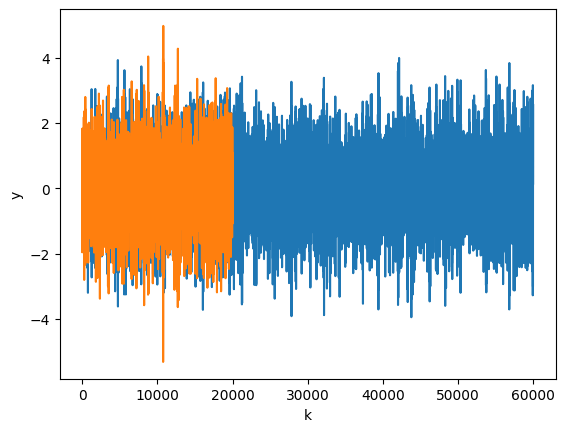

In [61]:
plt.plot(ytrain)
plt.plot(yval)
plt.xlabel('k')
plt.ylabel('y')
plt.show()

In [62]:
def make_OE_data(udata, ydata, nf=100):
    U = [] 
    Y = [] 
    for k in range(nf,len(udata)+1):
        U.append(udata[k-nf:k])
        Y.append(ydata[k-nf:k])
    return np.array(U), np.array(Y)

nfuture = 30
convert = lambda x: [torch.tensor(xi,dtype=torch.float64) for xi in x]
Utrain, Ytrain = convert(make_OE_data(utrain, ytrain, nf=nfuture))
Uval,   Yval   = convert(make_OE_data(uval,  yval,   nf=len(data_test_u)))

class simple_RNN(nn.Module):
    def __init__(self, hidden_size):
        super(simple_RNN, self).__init__()
        self.hidden_size = hidden_size
        self.input_size = 1
        self.output_size = 1
        net = lambda n_in,n_out: nn.Sequential(nn.Linear(n_in,40), \
                                               nn.Sigmoid(), \
                                               nn.Linear(40,n_out)).double() #new short hand
        self.h2h = net(self.input_size + hidden_size, self.hidden_size)
        self.h2o = net(self.input_size + hidden_size, self.output_size)
                                                                        #[:,0] should be called after use of h2o

    def forward(self, inputs):
        hidden = torch.zeros(inputs.shape[0], self.hidden_size, dtype = torch.float64)
        outputs = []
        for i in range(inputs.shape[1]):
            u = inputs[:,i]
            combined = torch.cat((hidden, u[:,None]), dim=1)
            outputs.append(self.h2o(combined)[:,0])
            hidden = self.h2h(combined)
        return torch.stack(outputs,dim=1)
    

In [65]:
n_burn = 10
batch_size = 64

model = simple_RNN(hidden_size=15)
optimizer = torch.optim.Adam(model.parameters())


ids = np.arange(len(Utrain),dtype=int) 
for epoch in range(50):
    np.random.shuffle(ids) #inspace shuffle of the ids of the trainin set to select a random subset 
    for i in range(0,len(Utrain),batch_size):
        ids_now = ids[i:i+batch_size] #the ids of the current batch
        Uin = Utrain[ids_now]
        Y_real = Ytrain[ids_now]

        y_predict = model.forward(inputs=Uin)
        residual = Y_real - y_predict
        Loss = torch.mean(residual[:,n_burn:]**2)

        optimizer.zero_grad()
        Loss.backward()
        optimizer.step()

    with torch.no_grad(): #monitor
        Loss_val = torch.mean((model(inputs=Uval)[:,n_burn:] - Yval[:,n_burn:])**2)**0.5
        Loss_train = torch.mean((model(inputs=Utrain)[:,n_burn:] - Ytrain[:,n_burn:])**2)**0.5
        print(f'epoch={epoch}, Validation NRMS={Loss_val.item():.2%}, Train NRMS={Loss_train.item():.2%}')

epoch=0, Validation NRMS=50.76%, Train NRMS=64.96%
epoch=1, Validation NRMS=43.47%, Train NRMS=63.30%
epoch=2, Validation NRMS=43.82%, Train NRMS=63.55%
epoch=3, Validation NRMS=43.63%, Train NRMS=63.61%
epoch=4, Validation NRMS=46.03%, Train NRMS=65.66%
epoch=5, Validation NRMS=43.48%, Train NRMS=63.49%
epoch=6, Validation NRMS=40.66%, Train NRMS=63.18%
epoch=7, Validation NRMS=44.38%, Train NRMS=65.98%
epoch=8, Validation NRMS=41.55%, Train NRMS=62.98%
epoch=9, Validation NRMS=46.11%, Train NRMS=66.13%
epoch=10, Validation NRMS=43.73%, Train NRMS=63.30%
epoch=11, Validation NRMS=41.80%, Train NRMS=64.35%
epoch=12, Validation NRMS=41.06%, Train NRMS=65.26%
epoch=13, Validation NRMS=42.03%, Train NRMS=63.21%
epoch=14, Validation NRMS=41.24%, Train NRMS=63.51%
epoch=15, Validation NRMS=45.36%, Train NRMS=65.49%
epoch=16, Validation NRMS=40.57%, Train NRMS=62.70%
epoch=17, Validation NRMS=40.65%, Train NRMS=63.94%
epoch=18, Validation NRMS=41.71%, Train NRMS=62.81%
epoch=19, Validation N

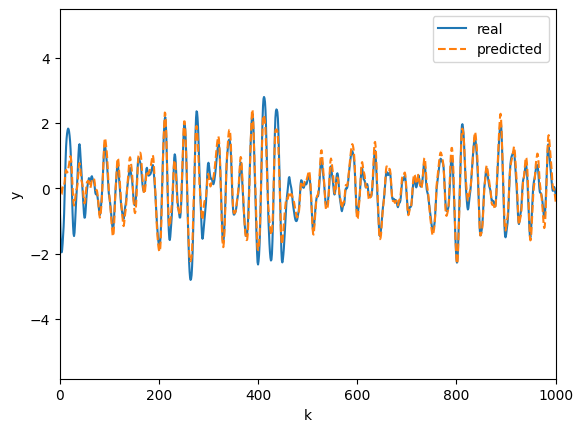

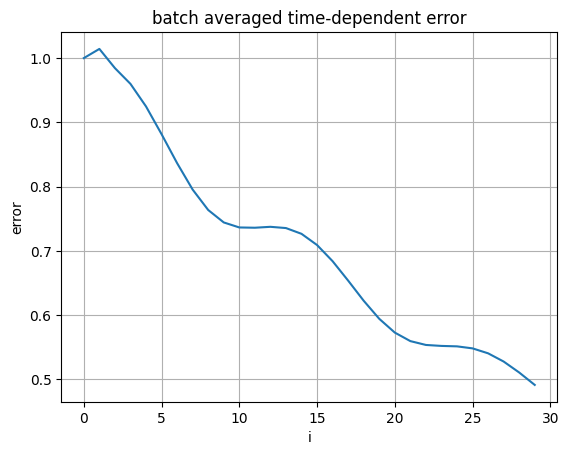

In [66]:
with torch.no_grad():
    plt.plot(Yval[0])
    plt.plot(model(inputs=Uval)[0],'--')
    plt.xlabel('k')
    plt.ylabel('y')
    plt.xlim(0,1000)
    plt.legend(['real','predicted'])
    plt.show()
    plt.plot(np.mean((Ytrain-model(inputs=Utrain)).numpy()**2,axis=0)**0.5) #average over the error in batch
    plt.title('batch averaged time-dependent error')
    plt.ylabel('error')
    plt.xlabel('i')
    plt.grid()
    plt.show()


In [77]:
def make_OE_init_state_data(udata, ydata, nf=100, n_encode=20):
    U = [] 
    Y = [] 
    hist = [] 
    for k in range(nf+n_encode,len(udata)+1):
        hist.append(np.concatenate((udata[k-nf-n_encode:k-nf], ydata[k-nf-n_encode:k-nf])))
        U.append(udata[k-nf:k])
        Y.append(ydata[k-nf:k])
    return np.array(hist), np.array(U), np.array(Y)

nfuture = 35
n_encode = 20
convert = lambda x: [torch.tensor(xi, dtype=torch.float64) for xi in x]
histtrain, Utrain, Ytrain = convert(make_OE_init_state_data(utrain, ytrain, nf=nfuture,            n_encode=n_encode))
histval,   Uval,   Yval   = convert(make_OE_init_state_data(uval,   yval,   nf=len(uval)-n_encode, n_encode=n_encode))

In [78]:
class simple_encoder_RNN(nn.Module):
    def __init__(self, hidden_size, n_encoder=20):
        super(simple_encoder_RNN, self).__init__()
        self.hidden_size = hidden_size
        self.input_size = 1
        self.output_size = 1
        net = lambda n_in,n_out: nn.Sequential(nn.Linear(n_in,40),nn.Sigmoid(),nn.Linear(40,n_out)).double() #short hand for a 1 hidden layer NN
        self.h2h = net(self.input_size + hidden_size, self.hidden_size)
        self.h2o = net(self.input_size + hidden_size, self.output_size)
        self.encoder = net(n_encoder*2,hidden_size).double()

    def forward(self,inputs,hist):
        hidden = self.encoder(hist)
        outputs = []
        for i in range(inputs.shape[1]):
            input = inputs[:,i]
            combined = torch.cat((hidden, input[:,None]), 1)
            outputs.append(self.h2o(combined)[:,0])
            hidden = self.h2h(combined)
        return torch.stack(outputs,dim=1)

In [104]:
min_loss_train=np.array([None,None,None])
min_loss_val=np.array([None,None,None])
for a in range(1,30):
    model = simple_encoder_RNN(a, n_encoder=n_encode)
    optimizer = torch.optim.Adam(model.parameters())
    batch_size = 64
    loss_train_list=[]
    loss_val_list=[]

    ids = np.arange(len(Utrain),dtype=int)
    for epoch in range(50):
        np.random.shuffle(ids)
        for i in range(0,len(Utrain),batch_size):
            ids_now = ids[i:i+batch_size]
            Uin = Utrain[ids_now]
            histin = histtrain[ids_now]
            Y_real = Ytrain[ids_now]

            Y_predict = model.forward(inputs=Uin, hist=histin)
            residual = Y_real - Y_predict 
            Loss = torch.mean(residual**2) #no burn time
        
            optimizer.zero_grad()
            Loss.backward()
            optimizer.step()
    
        with torch.no_grad():
            Loss_val = torch.mean((model(inputs=Uval,hist=histval) - Yval)**2)**0.5
            Loss_train = torch.mean((model(inputs=Utrain,hist=histtrain) - Ytrain)**2)**0.5
            print(f'epoch={epoch}, Validation Loss={Loss_val.item():.2%}, Train Loss={Loss_train.item():.2%}')
            loss_train_list.append(Loss_train.item())   #make a list of the loss values
            loss_val_list.append(Loss_val.item())
            index_lowest_train=loss_train_list.index(min(loss_train_list))  #find the index of the lowest 
            index_lowest_val=loss_val_list.index(min(loss_val_list))
    if None in min_loss_train:
        min_loss_train=[loss_train_list[index_lowest_train],loss_val_list[index_lowest_train],a]
        min_loss_val=[loss_train_list[index_lowest_val],loss_val_list[index_lowest_val],a]
    else:
        min_loss_train=np.vstack([min_loss_train,[loss_train_list[index_lowest_train],loss_val_list[index_lowest_val],a]])
        min_loss_val=np.vstack([min_loss_val,[loss_train_list[index_lowest_val],loss_val_list[index_lowest_val],a]])
    #min_loss_val.append(loss_val_list[index_lowest_val])

print("Smallest train loss with corresponding val loss(train loss, val loss, hidden size ):",min_loss_train )#min_loss_train[:,0],"with corresponding val loss:", min_loss_train[:,1], 
print("Smallest validation loss with corresponding train loss(train loss, vall loss, hidden size)", min_loss_val )


epoch=0, Validation Loss=89.97%, Train Loss=83.16%
epoch=1, Validation Loss=89.84%, Train Loss=82.81%
epoch=2, Validation Loss=89.94%, Train Loss=82.79%
epoch=3, Validation Loss=89.91%, Train Loss=82.73%
epoch=4, Validation Loss=89.97%, Train Loss=82.79%
epoch=5, Validation Loss=89.89%, Train Loss=82.68%
epoch=6, Validation Loss=90.25%, Train Loss=82.94%
epoch=7, Validation Loss=89.83%, Train Loss=82.63%
epoch=8, Validation Loss=89.99%, Train Loss=82.65%
epoch=9, Validation Loss=89.92%, Train Loss=82.62%
epoch=10, Validation Loss=89.98%, Train Loss=82.70%
epoch=11, Validation Loss=89.85%, Train Loss=82.60%
epoch=12, Validation Loss=89.82%, Train Loss=82.56%
epoch=13, Validation Loss=89.89%, Train Loss=82.60%
epoch=14, Validation Loss=90.19%, Train Loss=82.80%
epoch=15, Validation Loss=89.93%, Train Loss=82.61%
epoch=16, Validation Loss=89.92%, Train Loss=82.57%
epoch=17, Validation Loss=89.94%, Train Loss=82.57%
epoch=18, Validation Loss=89.94%, Train Loss=82.66%
epoch=19, Validation L

In [109]:
model = simple_encoder_RNN(hidden_size=19, n_encoder=n_encode)
optimizer = torch.optim.Adam(model.parameters())
batch_size = 64
loss_train_list=[]
loss_val_list=[]

ids = np.arange(len(Utrain),dtype=int)
for epoch in range(400):
    np.random.shuffle(ids)
    for i in range(0,len(Utrain),batch_size):
        ids_now = ids[i:i+batch_size]
        Uin = Utrain[ids_now]
        histin = histtrain[ids_now]
        Y_real = Ytrain[ids_now]

        Y_predict = model.forward(inputs=Uin, hist=histin)
        residual = Y_real - Y_predict 
        Loss = torch.mean(residual**2) #no burn time
        
        optimizer.zero_grad()
        Loss.backward()
        optimizer.step()
    
    with torch.no_grad():
        Loss_val = torch.mean((model(inputs=Uval,hist=histval) - Yval)**2)**0.5
        Loss_train = torch.mean((model(inputs=Utrain,hist=histtrain) - Ytrain)**2)**0.5
        print(f'epoch={epoch}, Validation Loss={Loss_val.item():.2%}, Train Loss={Loss_train.item():.2%}')
        loss_train_list.append(Loss_train.item())   #make a list of the loss values
        loss_val_list.append(Loss_val.item())



epoch=0, Validation Loss=36.84%, Train Loss=21.95%
epoch=1, Validation Loss=34.63%, Train Loss=19.58%
epoch=2, Validation Loss=37.13%, Train Loss=22.17%
epoch=3, Validation Loss=33.05%, Train Loss=17.42%
epoch=4, Validation Loss=32.67%, Train Loss=15.91%
epoch=5, Validation Loss=31.24%, Train Loss=15.19%
epoch=6, Validation Loss=31.35%, Train Loss=15.73%
epoch=7, Validation Loss=30.50%, Train Loss=19.69%
epoch=8, Validation Loss=28.29%, Train Loss=12.01%
epoch=9, Validation Loss=22.43%, Train Loss=8.32%
epoch=10, Validation Loss=23.57%, Train Loss=11.10%
epoch=11, Validation Loss=21.62%, Train Loss=7.45%
epoch=12, Validation Loss=22.50%, Train Loss=7.52%
epoch=13, Validation Loss=21.45%, Train Loss=7.47%
epoch=14, Validation Loss=21.26%, Train Loss=6.03%
epoch=15, Validation Loss=21.02%, Train Loss=6.16%
epoch=16, Validation Loss=20.93%, Train Loss=6.53%
epoch=17, Validation Loss=27.38%, Train Loss=9.30%
epoch=18, Validation Loss=21.72%, Train Loss=8.12%
epoch=19, Validation Loss=20.55

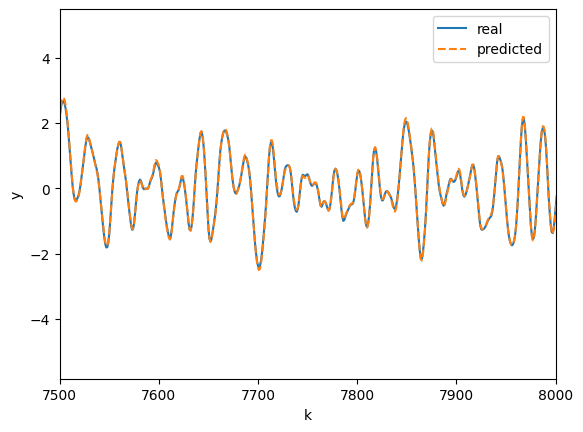

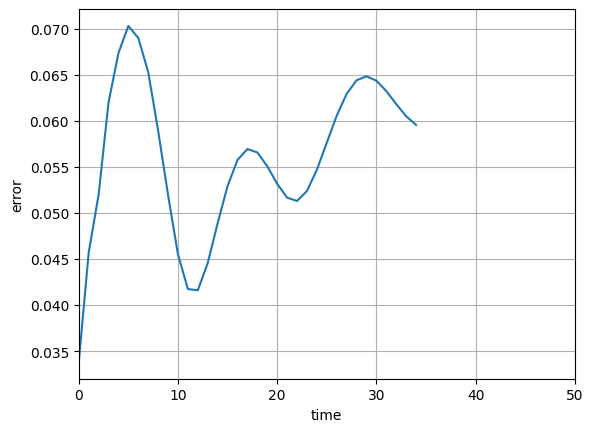

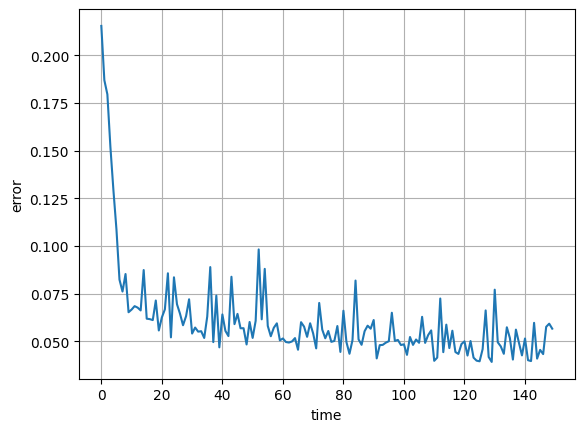

In [108]:
with torch.no_grad():
    plt.plot(Yval[0])
    plt.plot(model(inputs=Uval,hist=histval)[0],'--')
    plt.xlabel('k')
    plt.ylabel('y')
    plt.xlim(7500,8000)
    plt.legend(['real','predicted'])
    plt.show()
    plt.plot(np.mean((model(inputs=Utrain,hist=histtrain) - Ytrain).numpy()**2,axis=0)**0.5)
    plt.ylabel('error')
    plt.xlabel('time')
    plt.xlim(0,50)
    plt.grid()
    plt.show()
    plt.plot(loss_train_list)
    plt.ylabel('error')
    plt.xlabel('time')
    plt.grid()
    plt.show()

In [74]:
def make_OE_data(udata,ydata,nf=100):
    U = [] #[u[k-nf],...,u[k]]
    Y = [] #[y[k-nf],...,y[k]]
    for k in range(nf,len(udata)+1):
        U.append(udata[k-nf:k])
        Y.append(ydata[k-nf:k])
    return np.array(U),np.array(Y)

nfuture = 40
convert = lambda x: [torch.tensor(xi,dtype=torch.float64) for xi in x]
Utrain,Ytrain = convert(make_OE_data(utrain,ytrain,nf=nfuture))
Uval,Yval = convert(make_OE_data(uval,yval,nf=len(uval)))

class simple_lstm(nn.Module):
    def __init__(self, hidden_size):
        super(simple_lstm, self).__init__()
        self.hidden_size = hidden_size
        self.input_size = 1
        self.output_size = 1
        net = lambda n_in,n_out: nn.Sequential(nn.Linear(n_in,40),nn.Sigmoid(),nn.Linear(40,n_out)) #short hand for a 1 hidden layer NN
        self.lstm = nn.LSTM(input_size=self.input_size, hidden_size = hidden_size, batch_first=True).double()
        self.h2o = net(hidden_size + self.input_size, self.output_size).double()
    def forward(self, inputs):
        hiddens, (h_n,c_n)= self.lstm(inputs[:,:,None])
        combined = torch.cat((hiddens,inputs[:,:,None]),dim=2)
        h2o_input = combined.view(-1,self.hidden_size + self.input_size)
        y_predict= self.h2o(h2o_input).view(inputs.shape[0],inputs.shape[1])
        return y_predict

n_burn = 20
model = simple_lstm(hidden_size=15)
optimizer = torch.optim.Adam(model.parameters())
batch_size = 64

for epoch in range(50):
    for i in range(0,len(Utrain),batch_size):
        Uin = Utrain[i:i+batch_size]
        Yout = model.forward(inputs=Uin)
        Yin = Ytrain[i:i+batch_size]
        Loss = torch.mean((Yin[:,n_burn:] - Yout[:,n_burn:])**2)
        optimizer.zero_grad()
        Loss.backward()
        optimizer.step()
    
    with torch.no_grad():
        Loss_val = torch.mean((model(inputs=Uval)[:,n_burn:] - Yval[:,n_burn:])**2)**0.5
        Loss_train = torch.mean((model(inputs=Utrain)[:,n_burn:] - Ytrain[:,n_burn:])**2)**0.5
        print(f'epoch={epoch}, Validation Loss={Loss_val.item():.2%}, Train Loss={Loss_train.item():.2%}')

epoch=0, Validation Loss=41.93%, Train Loss=52.13%
epoch=1, Validation Loss=38.46%, Train Loss=50.68%
epoch=2, Validation Loss=37.15%, Train Loss=50.32%
epoch=3, Validation Loss=36.43%, Train Loss=50.11%
epoch=4, Validation Loss=35.99%, Train Loss=49.96%
epoch=5, Validation Loss=35.70%, Train Loss=49.84%
epoch=6, Validation Loss=35.50%, Train Loss=49.75%
epoch=7, Validation Loss=35.33%, Train Loss=49.67%
epoch=8, Validation Loss=35.20%, Train Loss=49.61%
epoch=9, Validation Loss=35.07%, Train Loss=49.55%
epoch=10, Validation Loss=34.96%, Train Loss=49.50%
epoch=11, Validation Loss=34.84%, Train Loss=49.45%
epoch=12, Validation Loss=34.73%, Train Loss=49.41%
epoch=13, Validation Loss=34.63%, Train Loss=49.37%
epoch=14, Validation Loss=34.52%, Train Loss=49.33%
epoch=15, Validation Loss=34.41%, Train Loss=49.30%
epoch=16, Validation Loss=34.30%, Train Loss=49.26%
epoch=17, Validation Loss=34.20%, Train Loss=49.23%
epoch=18, Validation Loss=34.09%, Train Loss=49.21%
epoch=19, Validation L

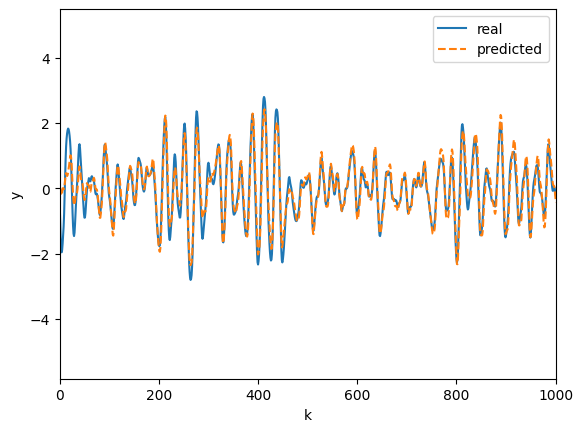

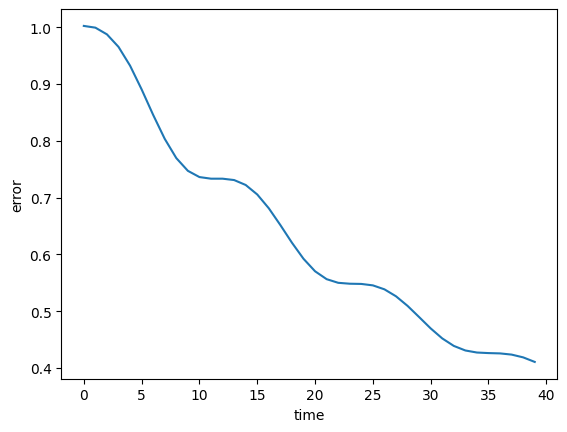

In [75]:
with torch.no_grad():
    plt.plot(Yval[0])
    plt.plot(model(inputs=Uval)[0],'--')
    plt.xlabel('k')
    plt.ylabel('y')
    plt.xlim(0,1000)
    plt.legend(['real','predicted'])
    plt.show()
    plt.plot(np.mean((Ytrain-model(inputs=Utrain)).numpy()**2,axis=0)**0.5)
    plt.ylabel('error')
    plt.xlabel('time')
    plt.show()